# Square case

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def create_2d_grid(N, p):
    # Setup array
    array = np.zeros((N, N), dtype=int)

    # Calculate the total number of elements and the number of 1s needed
    total_elements = N * N
    num_ones = int(total_elements * p)

    # Randomly select positions for the 1s
    indices = np.random.choice(total_elements, size=num_ones, replace=False)

    # Set the selected positions to 1
    array.flat[indices] = 1
    return array

def print_array_2d(grid, colorbar=True):
    # Plot the array
    plt.imshow(grid, cmap='gray', interpolation='none')
    if colorbar:
        plt.colorbar(label='Value')
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    plt.show()

In [2]:
from scipy.ndimage import label

# Check for percolation
def check_percolation_2d(grid, periodic = False):
    # Label connected components of 1s
    structure = np.array([[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]])  # Defines connectivity (4-connectivity)
    
    if periodic:
        grid = np.hstack((grid, grid))
        
    labeled_array, num_features = label(grid, structure=structure)
    
    # Find unique labels in the top and bottom rows
    top_labels = np.unique(labeled_array[0, :])
    bottom_labels = np.unique(labeled_array[-1, :])
    
    # Check if there's a common label in both top and bottom rows
    percolates = np.any(np.isin(top_labels, bottom_labels) & (top_labels != 0))
    return percolates


In [3]:
from tqdm import tqdm
# Parameters


def simulate_2d(N_vals, p_vals_count, iter_per_param, p_range=(0,1), periodic=False):
    data = np.zeros((len(N_vals), p_vals_count, 2))

    for N_i, N in tqdm(enumerate(N_vals)):
        for p_i, p in enumerate(np.linspace(p_range[0], p_range[1], p_vals_count)):
            for _ in range(iter_per_param):
                # Create grid
                grid = create_2d_grid(N, p)

                # Test for percolation
                perc_true = int(check_percolation_2d(grid, periodic=periodic))

                # Count
                data[N_i, p_i, perc_true] += 1
    
    return data

In [62]:
def plot_results_2d(data, p_range=(0,1), show_plot=True, custom_label='', include_halfmark=True):
    
    # Create a plot for each N
    possible_p_vals = np.linspace(p_range[0], p_range[1], p_vals_count)
    all_prob_perc_vals = []
    
    for i in range(data.shape[0]):
        prob_perc_vals = [data_pair[1]/(data_pair[0]+data_pair[1]) for data_pair in data[i]]
        
        all_prob_perc_vals.append(prob_perc_vals)
        
        p_vals = np.linspace(p_range[0], p_range[1], len(prob_perc_vals))
        
        if custom_label == '':
            plt.plot(p_vals, prob_perc_vals, label=N_vals[i])
        else:
            plt.plot(p_vals, prob_perc_vals, label=custom_label)
    if include_halfmark:
        plt.hlines(0.5, p_range[0], p_range[1], color='black', linestyles='dashed', label="50% mark")
    plt.legend()
    plt.xlabel("p - probability of individual cell being active")
    plt.ylabel("p_{perc} - probability of percolation occurring")
    if show_plot:
        plt.show()
    
    counter = 0
    if len(all_prob_perc_vals) == 4:
        for j, prob_perc_val in enumerate(all_prob_perc_vals[2]):
            if prob_perc_val < all_prob_perc_vals[3][j]:
                counter += 1
            else:
                counter = 0
            if counter >= 2:
                return (all_prob_perc_vals[3][j-2], possible_p_vals[j-2])
    return np.nan

False


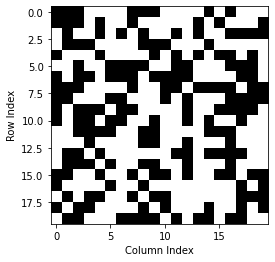

False


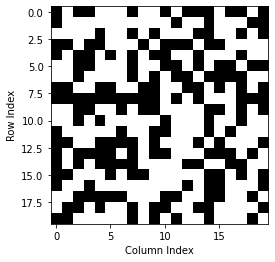

True


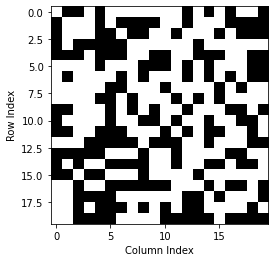

False


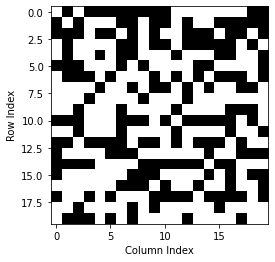

True


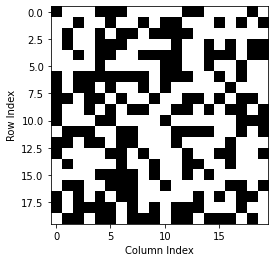

In [92]:
for _ in range(5):
    grid = create_2d_grid(20, 0.55)

    print(check_percolation_2d(grid))
    print_array_2d(grid, colorbar=False)

True


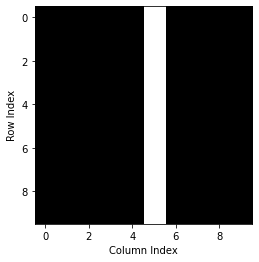

False


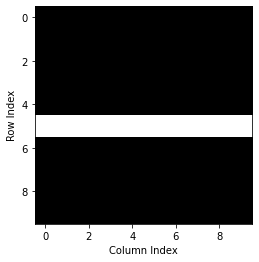

False


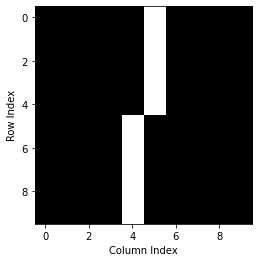

In [88]:
grid = np.zeros((10,10))
for i in range(10):
    grid[i, 5] = 1

print(check_percolation_2d(grid))
print_array_2d(grid, colorbar=False)

grid = np.zeros((10,10))
for i in range(10):
    grid[5, i] = 1

#grid[5,5] = 0

print(check_percolation_2d(grid))
print_array_2d(grid, colorbar=False)

grid = np.zeros((10,10))
for i in range(10):
    grid[i, 5 - i//5] = 1


print(check_percolation_2d(grid))
print_array_2d(grid, colorbar=False)

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


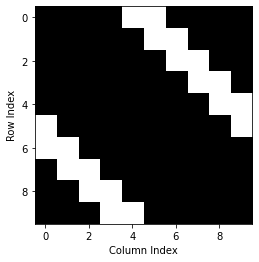

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


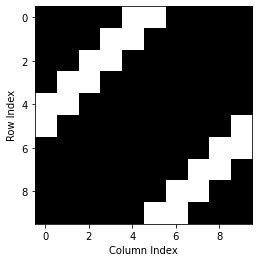

In [89]:
grid = np.zeros((10,10))

for i in range(10):
    grid[(5+i)%10, i] = 1
    grid[(5+i+1)%10, i] = 1

print("Percolation using non-periodic boundary?", check_percolation_2d(grid, periodic=False))
print("Percolation using periodic boundary?",check_percolation_2d(grid, periodic=True))
print_array_2d(grid, colorbar=False)

grid = np.zeros((10,10))

for i in range(10):
    grid[(4-i)%10, i] = 1
    grid[(4-i+1)%10, i] = 1

print("Percolation using non-periodic boundary?", check_percolation_2d(grid, periodic=False))
print("Percolation using periodic boundary?",check_percolation_2d(grid, periodic=True))
print_array_2d(grid, colorbar=False)

5it [00:09,  1.94s/it]


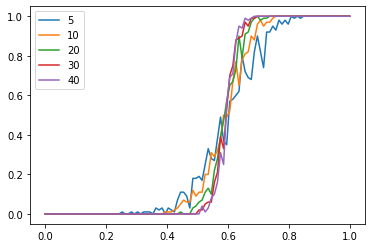

[0.6060606060606061,
 0.5858585858585859,
 0.595959595959596,
 0.595959595959596,
 0.595959595959596]

In [85]:
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 100

data_2d_coarse = simulate_2d(N_vals, p_vals_count, iter_per_param)
plot_results_2d(data_2d_coarse)

5it [00:05,  1.18s/it]


<IPython.core.display.Javascript object>


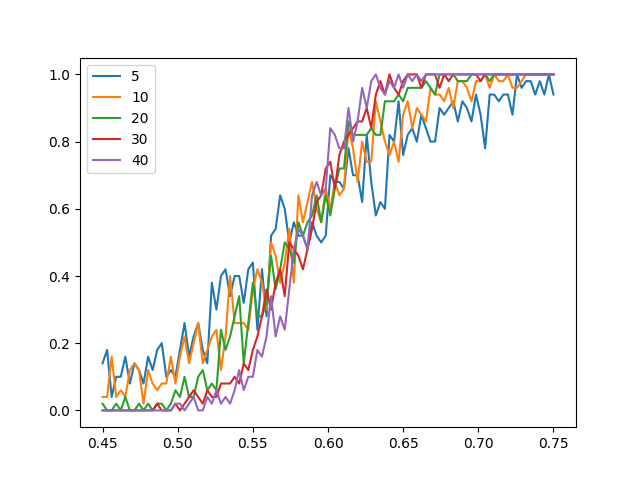

[0.5621212121212121,
 0.5621212121212121,
 0.5712121212121213,
 0.5742424242424242,
 0.5803030303030303]

In [68]:
N_vals = [5, 10, 20, 30, 40]
p_vals_count = 100
iter_per_param = 50
periodic = True
p_range=(0.45, 0.75)

data_2d_fine = simulate_2d(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
plot_results_2d(data_2d_fine, p_range=p_range)

In [41]:
# Gather data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 200
periodic = True
p_range=(0.45, 0.7)
#p_range=(0, 1)
files_square = []

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\square_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_square.append(file)

while True:
    
    data_square = simulate_2d(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
    
    for i, N in enumerate(N_vals):
        files_square[i].write(f"{list(data_square[i])}#")
    

4it [00:16,  4.14s/it]
4it [00:16,  4.18s/it]
4it [00:16,  4.06s/it]
4it [00:16,  4.05s/it]
4it [00:20,  5.24s/it]
4it [00:17,  4.44s/it]
4it [00:16,  4.18s/it]
4it [00:16,  4.07s/it]
4it [00:16,  4.09s/it]
4it [00:16,  4.06s/it]
4it [00:16,  4.05s/it]
4it [00:16,  4.09s/it]
4it [00:16,  4.06s/it]
4it [00:16,  4.24s/it]
4it [00:18,  4.67s/it]
4it [00:16,  4.08s/it]
4it [00:16,  4.08s/it]
4it [00:16,  4.11s/it]
4it [00:16,  4.09s/it]
4it [00:16,  4.07s/it]
4it [00:16,  4.10s/it]
4it [00:16,  4.07s/it]
4it [00:17,  4.27s/it]
4it [00:16,  4.12s/it]
4it [00:16,  4.10s/it]
4it [00:16,  4.08s/it]
4it [00:16,  4.10s/it]
4it [00:16,  4.07s/it]
4it [00:16,  4.10s/it]
4it [00:16,  4.08s/it]
4it [00:16,  4.05s/it]
4it [00:16,  4.11s/it]
4it [00:16,  4.10s/it]
4it [00:16,  4.22s/it]
4it [00:16,  4.03s/it]
4it [00:16,  4.07s/it]
4it [00:16,  4.06s/it]
4it [00:16,  4.06s/it]
4it [00:16,  4.10s/it]
4it [00:16,  4.11s/it]
4it [00:17,  4.35s/it]
4it [00:18,  4.56s/it]
4it [00:18,  4.53s/it]
4it [00:18,

KeyboardInterrupt: 

In [42]:
for file in files_square:
    file.close()

30100


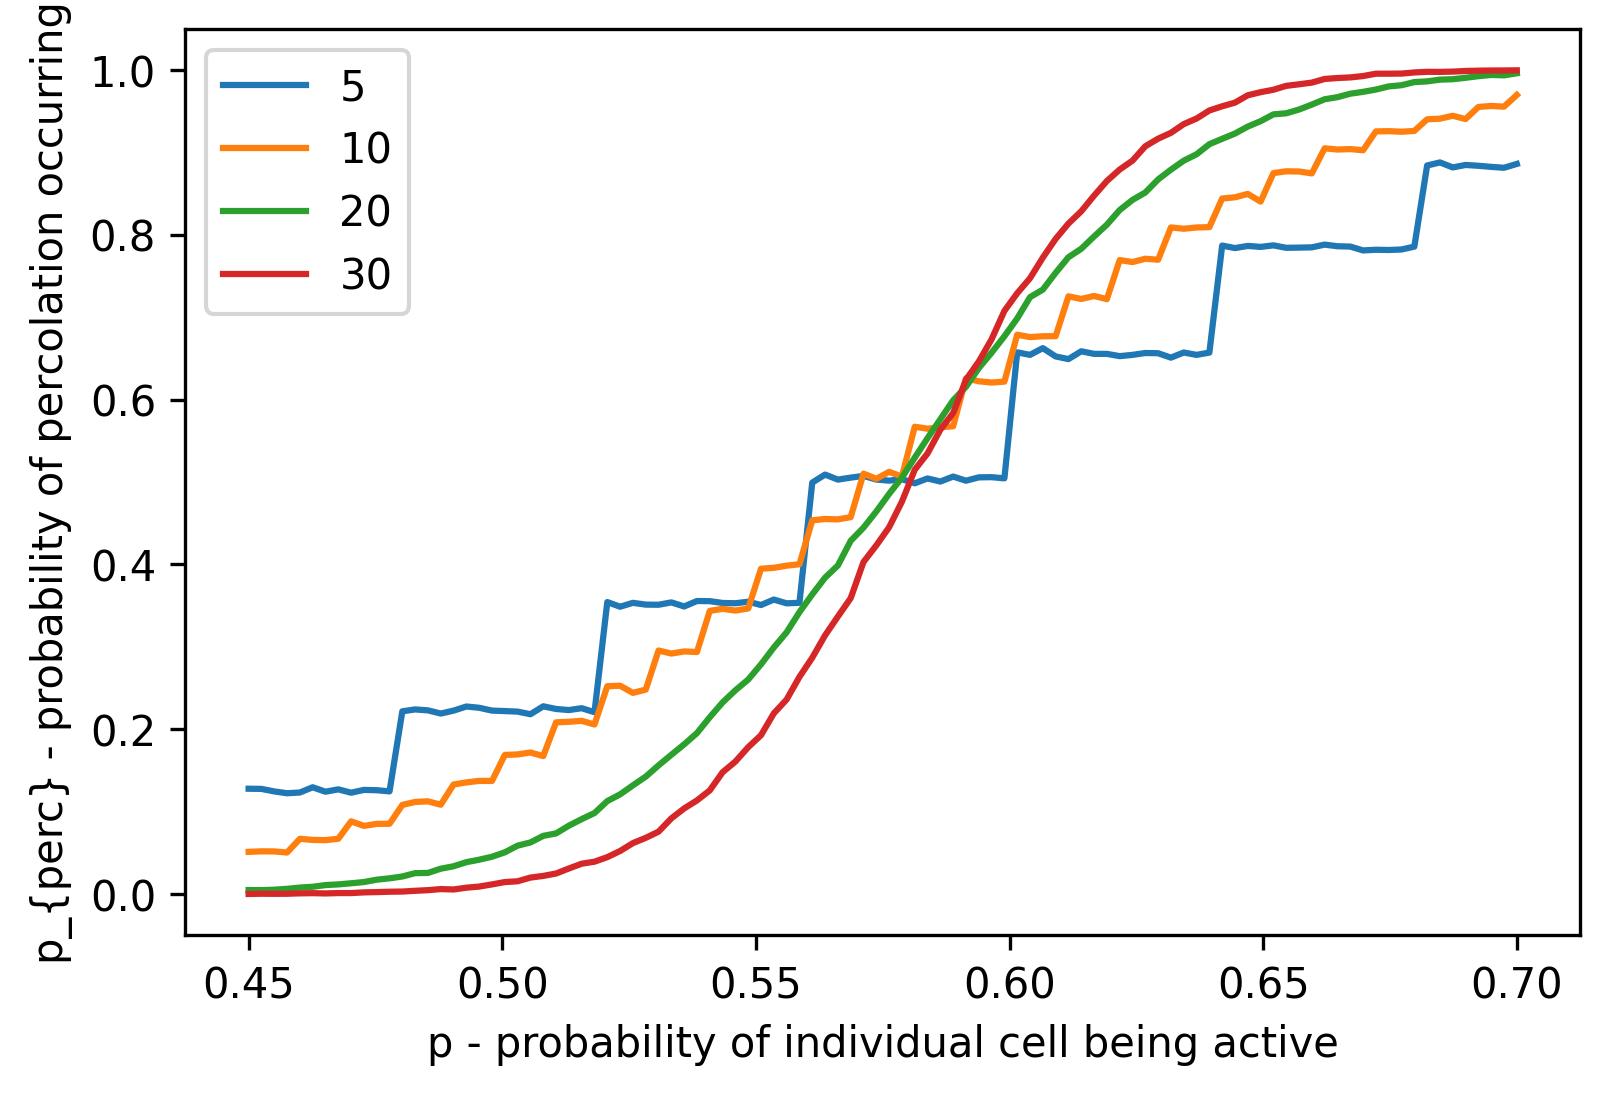

In [57]:
# Plot from data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
p_range=(0.45, 0.7)
#p_range=(0, 1)
periodic=True
data_square = []

all_N_total_arrs = []
for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\square_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)

all_N_total_arrs = np.array(all_N_total_arrs)
print(np.sum(all_N_total_arrs[1][0]))
plt.figure(dpi=300)
plot_results_2d(all_N_total_arrs, p_range=p_range, include_halfmark=False, show_plot=False)
plt.savefig('square_(0, 1).png')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(0.6239867109634551, 0.5914141414141414)


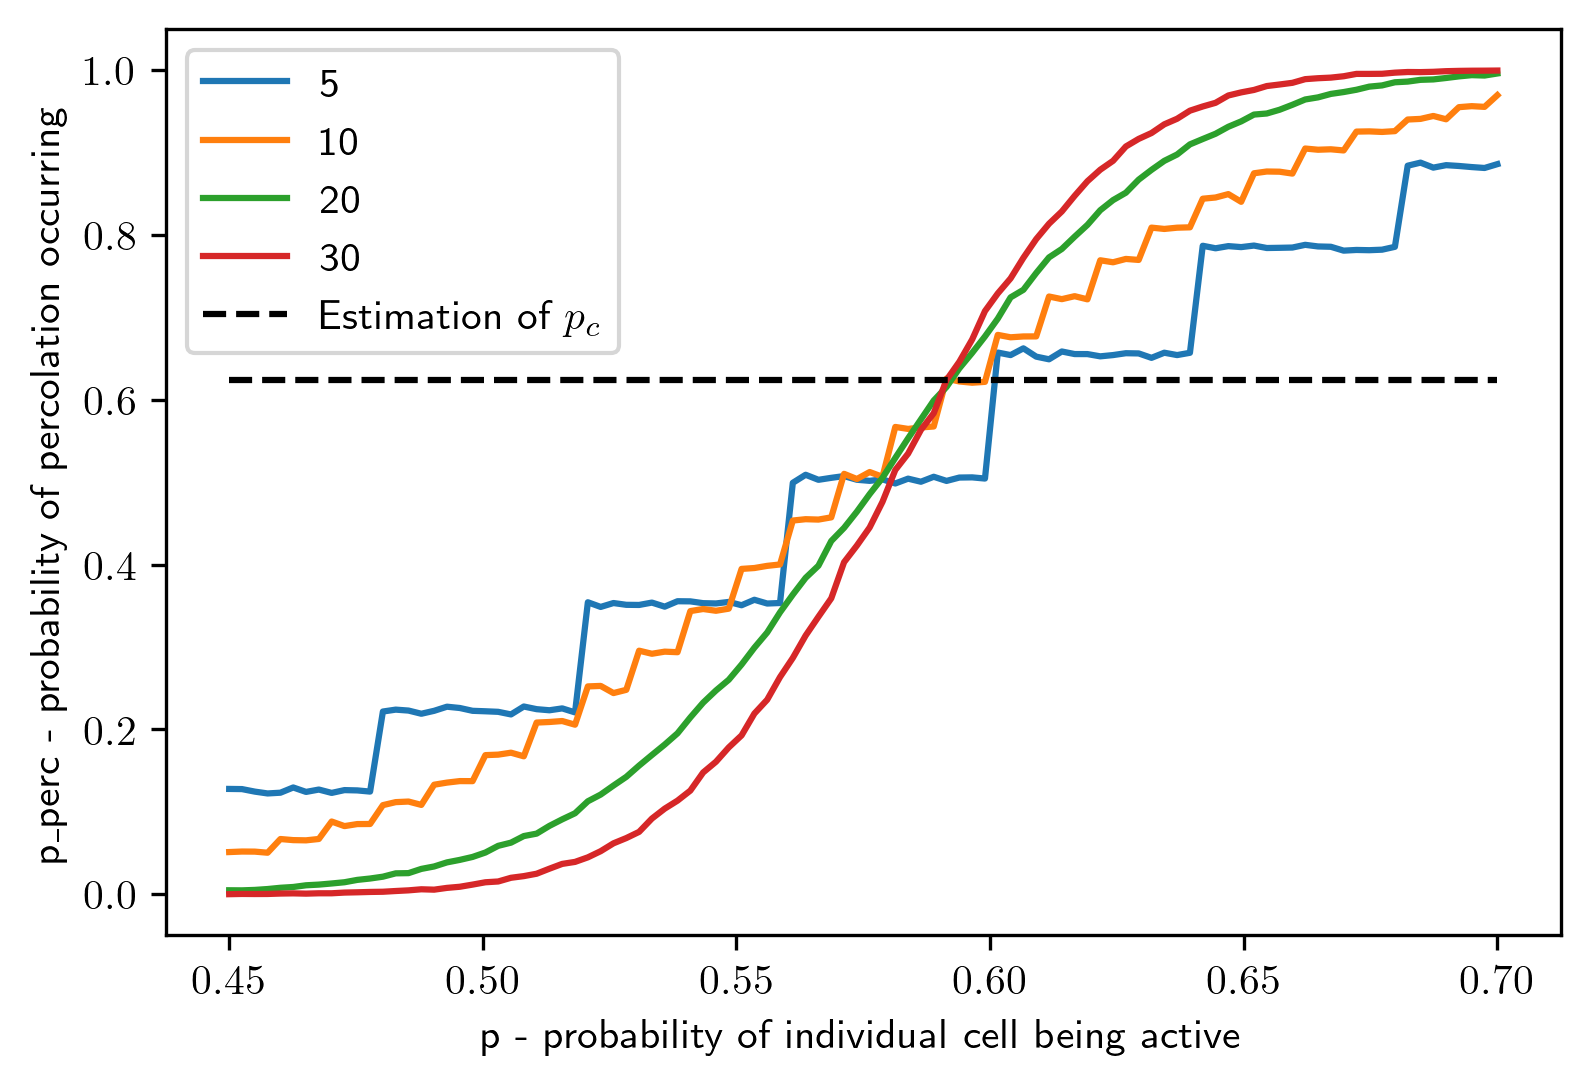

In [58]:
p_range=(0.45, 0.7)

plt.rcParams['text.usetex'] = True
plt.figure(dpi=300)
#plt.hlines(0.6180339887, p_range[0], p_range[1], color='black', label=r"$p^*=\varphi-1$")
plt.legend()
res = plot_results_2d(all_N_total_arrs, p_range=p_range, include_halfmark=False, show_plot=False)
print(res)
plt.hlines(res[0], p_range[0], p_range[1], color='black', linestyle='dashed', label=r"Estimation of $p_c$")
plt.legend()
plt.savefig('filename.png')
plt.rcParams['text.usetex'] = False

# Hexagon case

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon

def create_2d_grid_hex(N, p):
    # Setup array
    array = np.zeros((N, N), dtype=int)

    # Calculate the total number of elements and the number of 1s needed
    total_elements = N * N
    num_ones = int(total_elements * p)

    # Randomly select positions for the 1s
    indices = np.random.choice(total_elements, size=num_ones, replace=False)

    # Set the selected positions to 1
    array.flat[indices] = 1
    return array

def print_array_2d_hex(grid):
    # Dimensions of the matrix
    rows, cols = grid.shape

    # Create the plot
    fig, ax = plt.subplots(figsize=(6, 6))

    # Add hexagons
    hex_radius = 0.6  # Radius of the hexagon
    for row in range(rows):
        for col in range(cols):
            # Calculate the hexagon center positions
            x = col + 0.5 * (row % 2)  # Offset every other row
            y = np.sqrt(3) / 2 * row   # Vertical spacing

            # Create the hexagon
            color = 'white' if grid[row, col] == 1 else 'black'
            hexagon = RegularPolygon((x, y), numVertices=6, radius=hex_radius * 0.95, 
                                     orientation=np.radians(60),
                                     facecolor=color, edgecolor='gray')
            ax.add_patch(hexagon)

    # Set the limits and aspect ratio
    ax.set_xlim(-1, cols + 1)
    ax.set_ylim(-1, rows * np.sqrt(3) / 2 + 1)
    ax.set_aspect('equal')

    # Remove axes for better visual
    ax.axis('off')

    # Add a title
    #ax.set_title("Matrix as a Hexagonal Grid", fontsize=16)

    plt.show()

In [50]:
from scipy.ndimage import label

# Check for percolation
def check_percolation_2d_hex(grid, periodic = True):
    # Label connected components of 1s
    
    queue = []
    old_queue = []
    
    for i in range(grid.shape[0]):
        if grid[0, i] == 1:
            queue.append((0,i))
            

    
    while len(queue) > 0:
        val = queue.pop()
        old_queue.append(val)
        #print(val)

        if val[0] % 2 == 0:
            neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1), (-1, 1), (-1, -1)]
        else:
            neighbors = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1)]
            
        
        for dx, dy in neighbors:
            
            new_y = val[0]+dy
            if periodic:
                new_x = (val[1]+dx) % grid.shape[0]                
            else:
                new_x = val[1]+dx

            if new_y < grid.shape[0] and \
               new_y >= 0 and \
               new_x < grid.shape[0] and \
               new_x >= 0:
                
                if grid[new_y, new_x] == 1:
                    if new_y == grid.shape[0]-1:
                        return True
                    if (val[0]+dy, new_x) not in queue and (new_y, new_x) not in old_queue:
                        queue.append((new_y, new_x))  
                        
    
    return False


In [49]:
from tqdm import tqdm
# Parameters


def simulate_2d_hex(N_vals, p_vals_count, iter_per_param, p_range=(0,1), periodic=False):
    data = np.zeros((len(N_vals), p_vals_count, 2))

    for N_i, N in tqdm(enumerate(N_vals)):
        for p_i, p in enumerate(np.linspace(p_range[0], p_range[1], p_vals_count)):
            for _ in range(iter_per_param):
                # Create grid
                grid = create_2d_grid_hex(N, p)

                # Test for percolation
                perc_true = int(check_percolation_2d_hex(grid, periodic=periodic))

                # Count
                data[N_i, p_i, perc_true] += 1
    return data

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


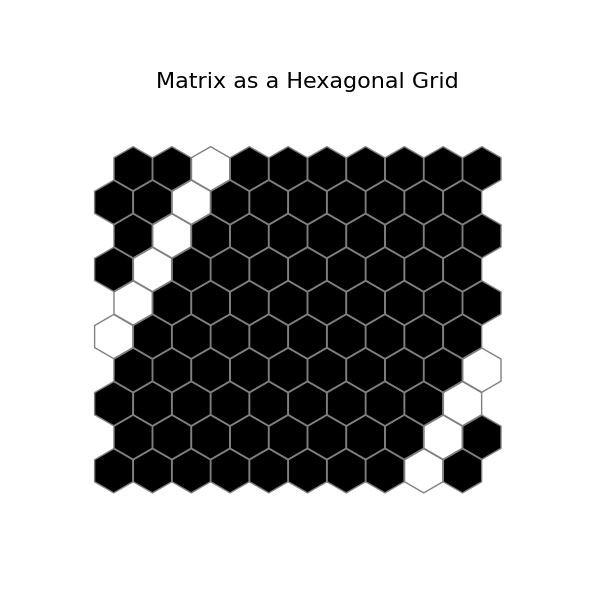

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


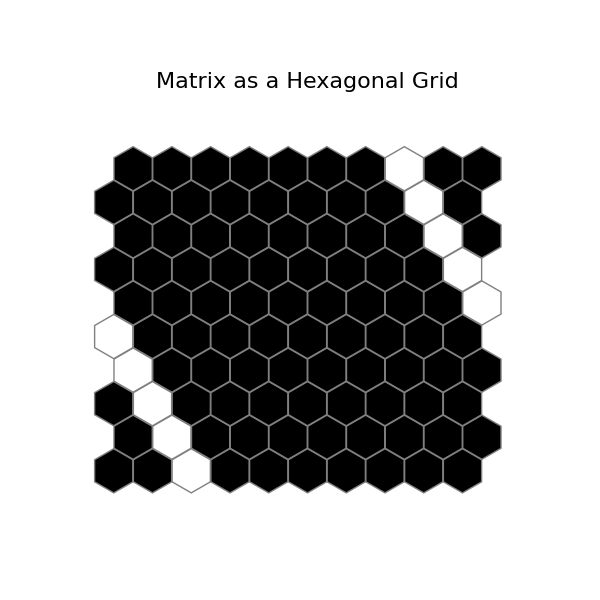

In [320]:
grid = np.zeros((10,10))

for i in range(10):
    grid[i, (8+i//2)%10] = 1

print("Percolation using non-periodic boundary?", check_percolation_2d_hex(grid, periodic=False))
print("Percolation using periodic boundary?",check_percolation_2d_hex(grid, periodic=True))
print_array_2d_hex(grid)

grid = np.zeros((10,10))

for i in range(10):
    grid[i, (2-(i+1)//2)%10] = 1

print("Percolation using non-periodic boundary?", check_percolation_2d_hex(grid, periodic=False))
print("Percolation using periodic boundary?",check_percolation_2d_hex(grid, periodic=True))
print_array_2d_hex(grid)

True


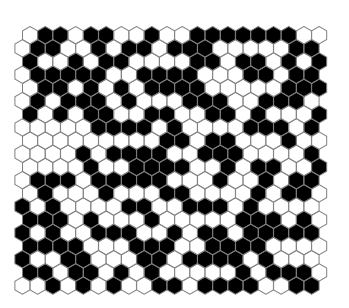

False


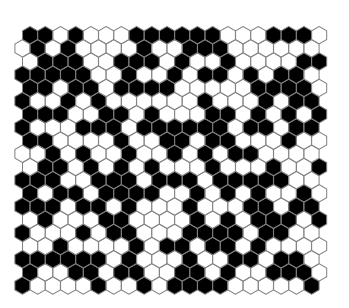

True


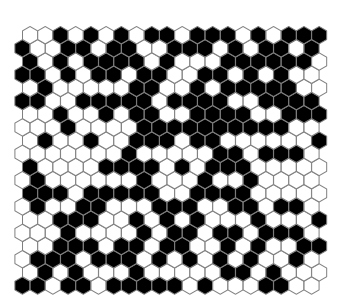

True


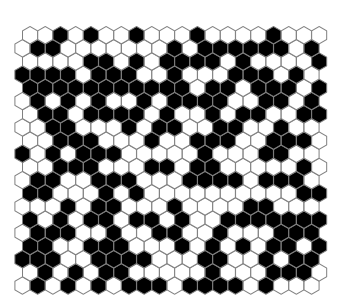

True


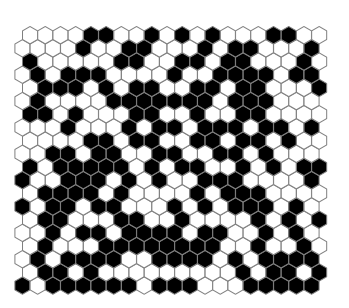

In [125]:
for _ in range(5):
    grid = create_2d_grid_hex(20, 0.5)

    print(check_percolation_2d_hex(grid, periodic=True))
    print_array_2d_hex(grid)

4it [02:04, 31.16s/it]


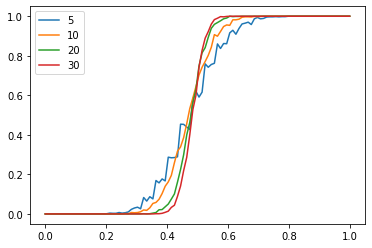

[0.48484848484848486,
 0.4747474747474748,
 0.48484848484848486,
 0.48484848484848486]

In [128]:
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 1000

data_2d_hex_coarse = simulate_2d_hex(N_vals, p_vals_count, iter_per_param, periodic=True)
plot_results_2d(data_2d_hex_coarse)

5it [02:26, 29.38s/it]


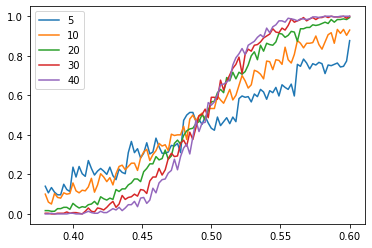

[0.4646464646464647,
 0.48484848484848486,
 0.5151515151515152,
 0.5151515151515152,
 0.5353535353535354]

In [44]:
N_vals = [5, 10, 20, 30, 40]
p_vals_count = 100
iter_per_param = 300
p_range=(0.38, 0.6)

data_2d_hex_fine = simulate_2d_hex(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=True)
plot_results_2d(data_2d_hex_fine, p_range=p_range)

In [65]:
# Gather data
N_vals = [5, 10, 20, 30]
#N_vals = [30]
p_vals_count = 100
iter_per_param = 100
#p_range=(0.38, 0.6)
p_range=(0, 1)
files_hexagon = []
periodic = True

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\hexagon_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_hexagon.append(file)

while True:
    
    data_hexagon = simulate_2d_hex(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
    
    for i, N in enumerate(N_vals):
        files_hexagon[i].write(f"{list(data_hexagon[i])}#")
    

4it [00:13,  3.46s/it]
4it [00:12,  3.20s/it]
4it [00:13,  3.47s/it]
4it [00:13,  3.39s/it]
4it [00:13,  3.39s/it]
4it [00:11,  2.93s/it]
4it [00:12,  3.04s/it]
4it [00:12,  3.06s/it]
4it [00:13,  3.42s/it]
4it [00:12,  3.18s/it]
4it [00:11,  2.89s/it]
1it [00:00,  1.05it/s]


KeyboardInterrupt: 

In [66]:
for file in files_hexagon:
    file.close()

1100
(0.6333333333333333, 0.494949494949495)


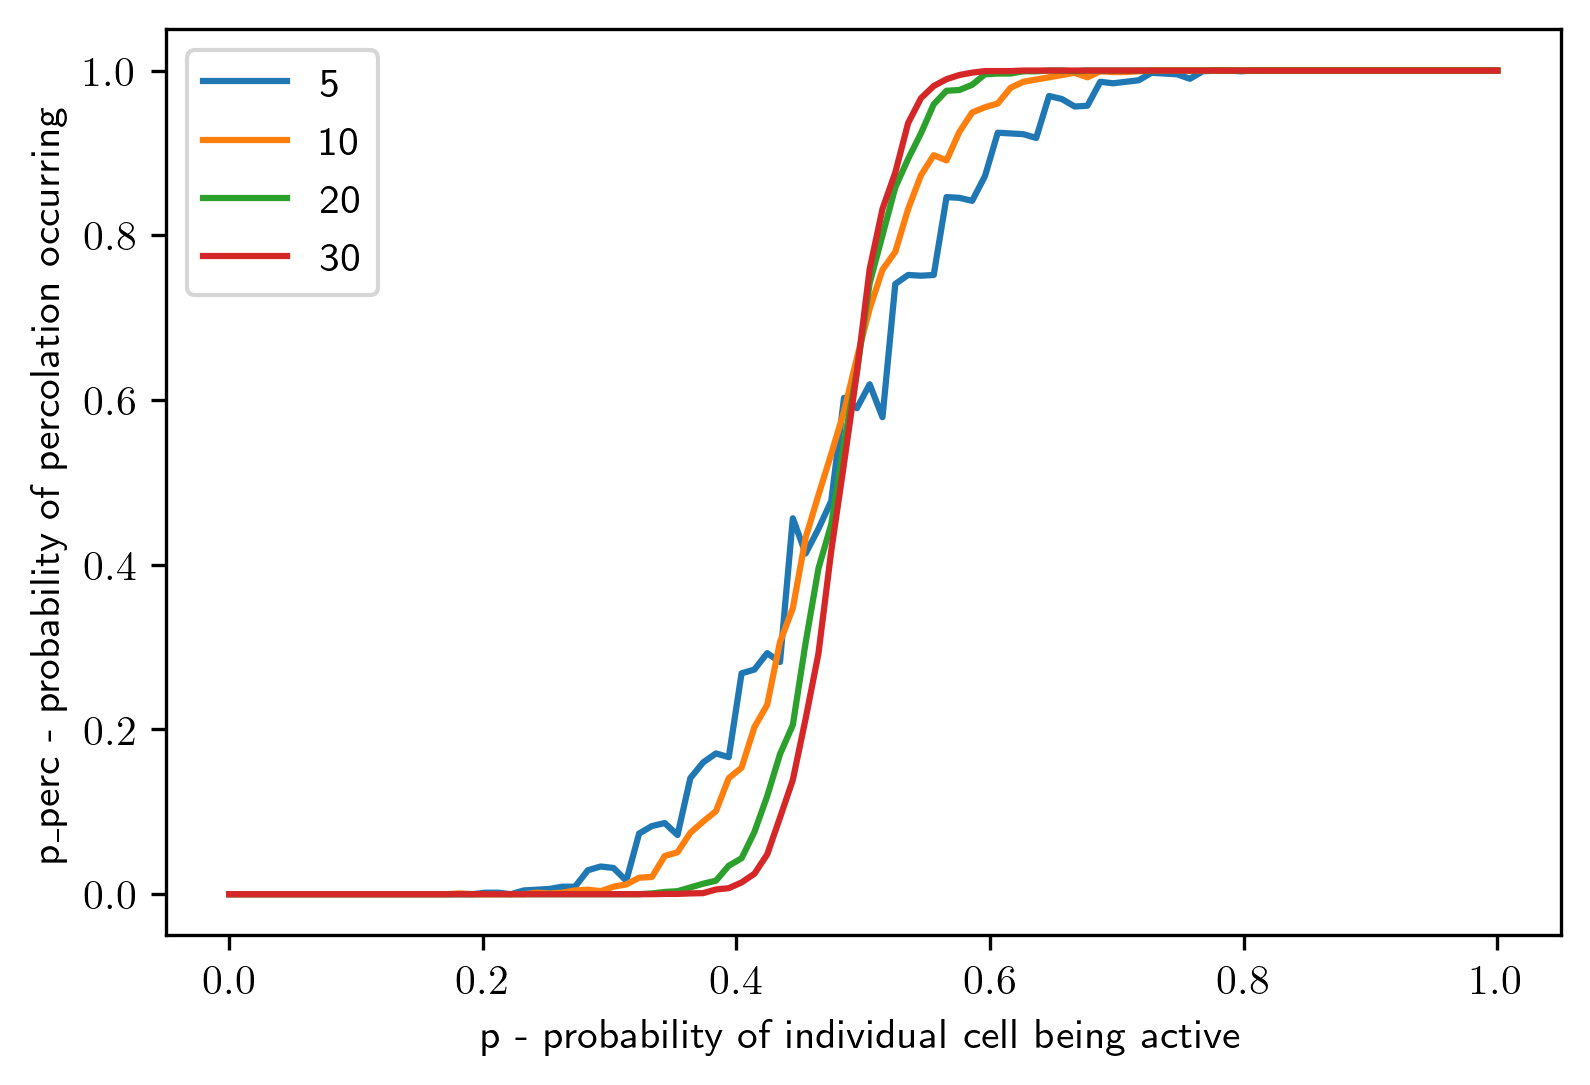

In [68]:
# Plot from data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
p_range=(0.38, 0.6)
p_range=(0, 1)
periodic=True
data_square = []

all_N_total_arrs = []
for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\hexagon_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)

all_N_total_arrs = np.array(all_N_total_arrs)
print(np.sum(all_N_total_arrs[0][0]))

plt.rcParams['text.usetex'] = True
plt.figure(dpi=300)
#plt.hlines(0.6180339887, p_range[0], p_range[1], color='black', label=r"$p^*=\varphi-1$")
res = plot_results_2d(all_N_total_arrs, p_range=p_range, include_halfmark=False, show_plot=False)
print(res)
#plt.hlines(res[0], p_range[0], p_range[1], color='black', linestyle='dashed', label=r"Estimation of $p_c$")
plt.legend()
plt.savefig('hex_pplot(0.38, 0.6).png')
plt.rcParams['text.usetex'] = False

# 3D cube case

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def create_3d_grid(N, p):
    # Setup array
    array = np.zeros((N, N, N), dtype=int)

    # Calculate the total number of elements and the number of 1s needed
    total_elements = N * N * N
    num_ones = int(total_elements * p)

    # Randomly select positions for the 1s
    indices = np.random.choice(total_elements, size=num_ones, replace=False)

    # Set the selected positions to 1
    array.flat[indices] = 1
    return array

def print_array_3d(grid):
    # Plot the array
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Define the positions of the 1s in the 3D grid
    x, y, z = np.where(grid == 1)

    # Plot the 1s as voxels
    ax.voxels(grid, facecolors='yellow', edgecolor='k')

    # Customize the plot
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    #ax.set_title('3D Binary Array Visualization')

    plt.show()

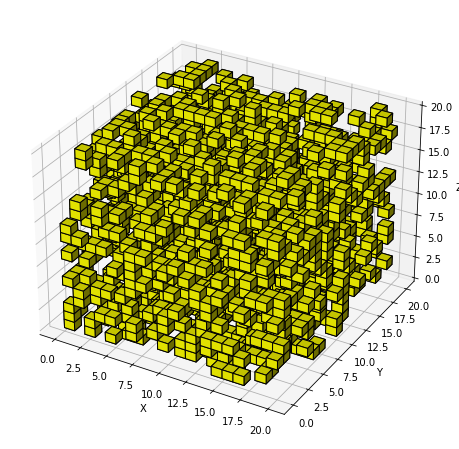

In [133]:
grid = create_3d_grid(20, 0.2)
print_array_3d(grid)

In [19]:
def check_percolation_3d(grid, periodic=False):
    """
    Check if there is percolation in a 3D binary array.
    
    Percolation occurs if there's a connected path of 1's from the front face
    (grid[:, :, 0]) to the back face (grid[:, :, -1]).
    
    Parameters:
        grid (np.ndarray): 3D binary array.
    
    Returns:
        bool: True if percolation occurs, False otherwise.
    """
    # Define connectivity (6-connectivity: faces only)
    structure = np.array([[[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]],
                          [[0, 1, 0],
                           [1, 1, 1],
                           [0, 1, 0]],
                          [[0, 0, 0],
                           [0, 1, 0],
                           [0, 0, 0]]])  # Von-Neumann neighborhood
    
    if periodic:
        grid = np.hstack((grid, grid))
    
    # Label connected components
    labeled_array, num_features = label(grid, structure=structure)
    
    # Find unique labels on the front and back faces
    front_labels = np.unique(labeled_array[:, :, 0])
    back_labels = np.unique(labeled_array[:, :, -1])
    
    # Check if there is a common label in front and back faces
    percolates = np.any(np.isin(front_labels, back_labels) & (front_labels != 0))
    
    return percolates

In [20]:
from tqdm import tqdm
# Parameters


def simulate_3d(N_vals, p_vals_count, iter_per_param, p_range=(0,1), periodic=False):
    data = np.zeros((len(N_vals), p_vals_count, 2))

    for N_i, N in tqdm(enumerate(N_vals)):
        for p_i, p in enumerate(np.linspace(p_range[0], p_range[1], p_vals_count)):
            for _ in range(iter_per_param):
                # Create grid
                grid = create_3d_grid(N, p)

                # Test for percolation
                perc_true = int(check_percolation_3d(grid, periodic=periodic))

                # Count
                data[N_i, p_i, perc_true] += 1
    return data

In [99]:
def plot_results_3d(data, p_range=(0,1), show_plot=True, custom_label='', include_halfmark = True):
    
    
    # Create a plot for each N
    possible_p_vals = np.linspace(p_range[0], p_range[1], p_vals_count)
    all_prob_perc_vals = []
    
    for i in range(data.shape[0]):
        prob_perc_vals = [data_pair[1]/(data_pair[0]+data_pair[1]) for data_pair in data[i]]
        all_prob_perc_vals.append(prob_perc_vals)
        
        p_vals = np.linspace(p_range[0], p_range[1], len(prob_perc_vals))
        
        if custom_label == '':
            plt.plot(p_vals, prob_perc_vals, label=N_vals[i])
        else:
            plt.plot(p_vals, prob_perc_vals, label=custom_label)
           
    if include_halfmark:
        plt.hlines(0.5, p_range[0], p_range[1], color='black', linestyles='dashed', label="50% mark")
    plt.legend()
    plt.xlabel("p - probability of individual cell being active")
    plt.ylabel("p_{perc} - probability of percolation occurring")
    if show_plot:
        plt.show()
        
    counter = 0
    if len(all_prob_perc_vals) == 4:
        for j, prob_perc_val in enumerate(all_prob_perc_vals[2]):
            if prob_perc_val < all_prob_perc_vals[3][j]:
                counter += 1
            else:
                counter = 0
            if counter >= 1:
                return (all_prob_perc_vals[3][j-1], possible_p_vals[j-1])
    return np.nan

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


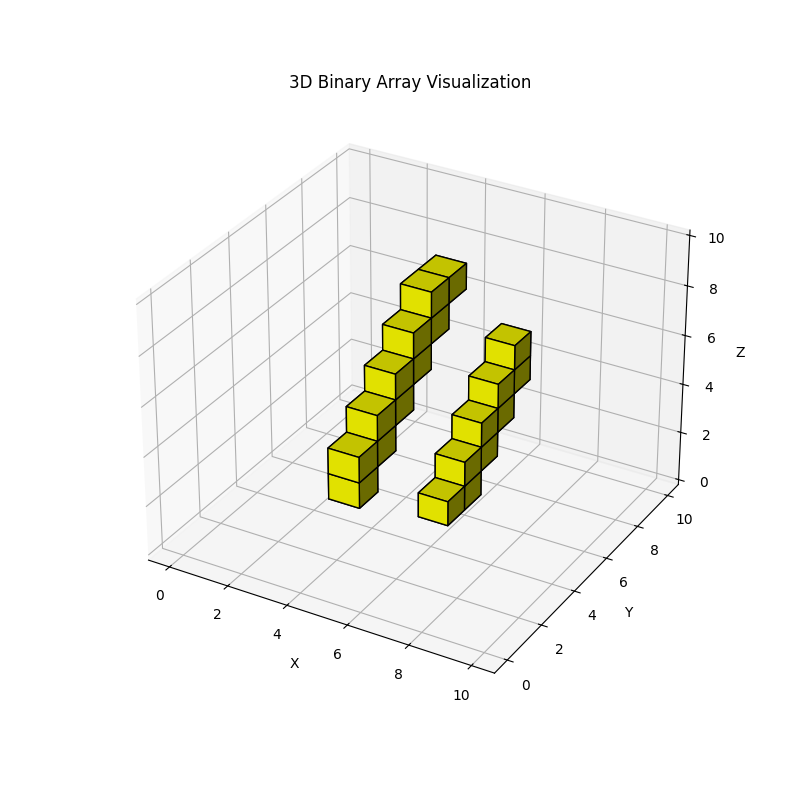

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


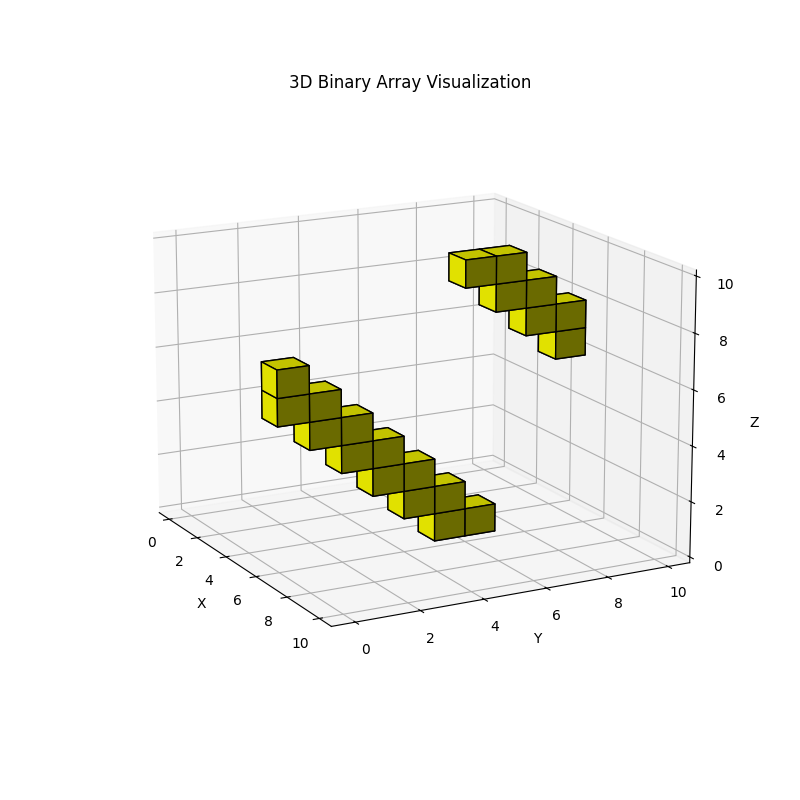

In [326]:
grid = np.zeros((10,10,10))

for i in range(10):
    grid[5,(5+i)%10,i] = 1
    grid[5,(5+i+1)%10,i] = 1
    
print("Percolation using non-periodic boundary?", check_percolation_3d(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d(grid, periodic=True))
print_array_3d(grid)

grid = np.zeros((10,10,10))

for i in range(10):
    grid[5,(5-i)%10,i] = 1
    grid[5,(5-i+1)%10,i] = 1

print("Percolation using non-periodic boundary?", check_percolation_3d(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d(grid, periodic=True))
print_array_3d(grid)

4it [00:06,  1.61s/it]


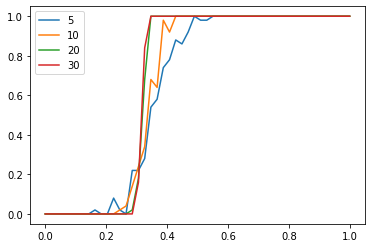

[0.3469387755102041,
 0.3469387755102041,
 0.32653061224489793,
 0.32653061224489793]

In [112]:
N_vals = [5, 10, 20, 30]
p_vals_count = 50
iter_per_param = 50

data_3d_coarse = simulate_3d(N_vals, p_vals_count, iter_per_param)
plot_results_3d(data_3d_coarse)

4it [00:17,  4.28s/it]


<IPython.core.display.Javascript object>


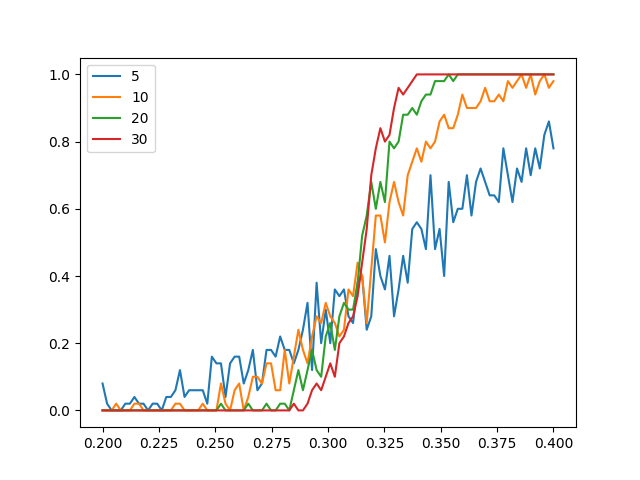

[0.3373737373737374,
 0.3212121212121212,
 0.3151515151515152,
 0.3171717171717172]

In [53]:
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
periodic = True
p_range=(0.2, 0.4)

data_3d_coarse = simulate_3d(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
plot_results_3d(data_3d_coarse, p_range=p_range)

In [148]:
# Gather data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
p_range=(0.2, 0.4)
p_range=(0, 1)
periodic = True
files_cube = []

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\cube_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_cube.append(file)

while True:
    data_cube = simulate_3d(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
    
    for i, N in enumerate(N_vals):
        files_cube[i].write(f"{list(data_cube[i])}#")
    

4it [00:18,  4.57s/it]
4it [00:18,  4.51s/it]
4it [00:17,  4.36s/it]
4it [00:17,  4.49s/it]
4it [00:18,  4.52s/it]
4it [00:18,  4.61s/it]
4it [00:17,  4.44s/it]
4it [00:17,  4.39s/it]
4it [00:17,  4.48s/it]
4it [00:17,  4.42s/it]
4it [00:17,  4.41s/it]
4it [00:17,  4.44s/it]
4it [00:17,  4.43s/it]
4it [00:17,  4.45s/it]
4it [00:18,  4.50s/it]
4it [00:17,  4.37s/it]
4it [00:17,  4.49s/it]
4it [00:17,  4.36s/it]
4it [00:17,  4.47s/it]
4it [00:17,  4.36s/it]
4it [00:17,  4.49s/it]
4it [00:20,  5.20s/it]
4it [00:26,  6.51s/it]
4it [00:26,  6.68s/it]
4it [00:28,  7.03s/it]
4it [00:27,  6.88s/it]
4it [00:26,  6.65s/it]
4it [00:26,  6.61s/it]
4it [00:26,  6.72s/it]
3it [00:11,  4.00s/it]


KeyboardInterrupt: 

In [149]:
for file in files_cube:
    file.close()

5800
(0.38517241379310346, 0.3111111111111111)
(0.3551724137931035, 0.3111111111111111)


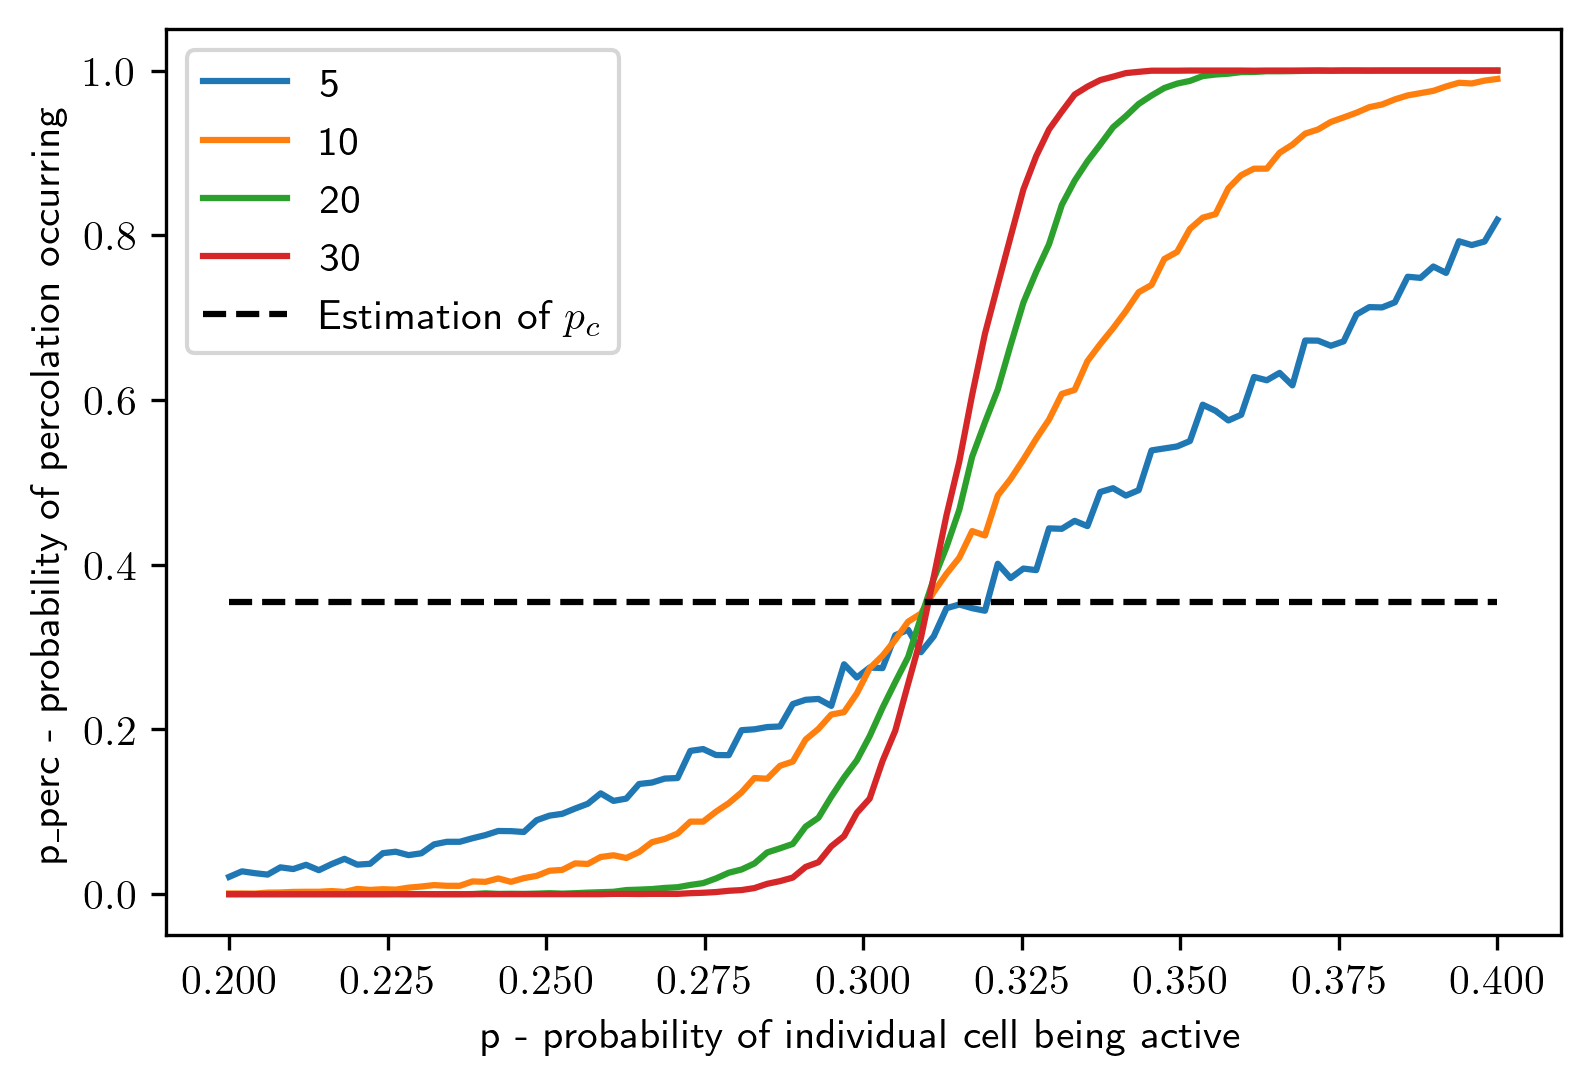

In [86]:
# Plot from data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
p_range=(0.2, 0.4)
#p_range=(0, 1)
periodic = True
data_square = []

all_N_total_arrs = []
for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\cube_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)

all_N_total_arrs = np.array(all_N_total_arrs)
print(np.sum(all_N_total_arrs[0][0]))

plt.rcParams['text.usetex'] = True
plt.figure(dpi=300)
#plt.hlines(0.6180339887, p_range[0], p_range[1], color='black', label=r"$p^*=\varphi-1$")
res = plot_results_3d(all_N_total_arrs, p_range=p_range, include_halfmark=False, show_plot=False)
print(res)
res = (res[0]-0.03, res[1])
print(res)
plt.hlines(res[0], p_range[0], p_range[1], color='black', linestyle='dashed', label=r"Estimation of $p_c$")
plt.legend()
plt.savefig('cube_plot(0.38, 0.6).png')
plt.rcParams['text.usetex'] = False

# 3D Rhombic dodecahedra case (RDG-4)

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def create_3d_RDG(N, p):
    # Setup array
    array = np.zeros((N, N, N), dtype=int)

    # Calculate the total number of elements and the number of 1s needed
    total_elements = N * N * N
    num_ones = int(total_elements * p)

    # Randomly select positions for the 1s
    indices = np.random.choice(total_elements, size=num_ones, replace=False)

    # Set the selected positions to 1
    array.flat[indices] = 1
    return array

In [25]:
# Load lightning visualization capabilities
%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import copy
from ipywidgets import *

def rhombic_dodecahedron_vertices():
    """Return the vertices of a rhombic dodecahedron centered at the origin."""
    vertices = np.array([
        [ 1,  1,  1], # 0
        [ 1,  1, -1], # 1
        [ 1, -1,  1], # 2
        [ 1, -1, -1], # 3
        [-1,  1,  1], # 4
        [-1,  1, -1], # 5
        [-1, -1,  1], # 6
        [-1, -1, -1], # 7
        [ 0,  0,  2], # 8
        [ 0,  0, -2], # 9
        [ 0,  2,  0], # 10
        [ 0, -2,  0], # 11
        [ 2,  0,  0], # 12
        [-2,  0,  0]  # 13
    ])
    return vertices / np.sqrt(2)

def rhombic_dodecahedron_faces():
    """Return the faces of a rhombic dodecahedron using vertex indices."""
    faces = [
        [0, 8, 2, 12], [6, 8, 4, 13], [0, 8, 4, 10], [2, 8, 6, 11], # top 4
        [0, 10, 1, 12], [2, 12, 3, 11], [6, 11, 7, 13], [4, 13, 5, 10], # middle 4
        [1, 9, 3, 12], [7, 9, 5, 13], [1, 9, 5, 10], [3, 9, 7, 11] # bottom 4
    ]
    return faces

def plot_rhombic_dodecahedron(ax, pos=(0,0,0), color='cyan', alpha=0.3, scale=1, line_thickness = 1):
    vertices = rhombic_dodecahedron_vertices()
    faces = rhombic_dodecahedron_faces()

    pos = np.array(pos)

    cartes_pos = copy.deepcopy(pos)
    cartes_pos[0] += pos[1]# - 1*pos[2]//2

    cartes_pos[1] -= pos[0]# + 1*(pos[2]//2)

    #if pos[2] % 2 == 1:
    cartes_pos[0] += pos[2]
        #color = 'orange'

    poly3d = [[(np.array(vertices[vertice])+np.array(cartes_pos)*np.sqrt(2))*scale for vertice in face] for face in faces]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors=color, linewidths=0.5*line_thickness, edgecolors='r', alpha=alpha))

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_zlim([-4, 4])


def plot_3d_RDG4_grid(pos_list, colors=[], alphas=[], scale=1, line_thickness=1):
    
    plt.ion()
    if len(colors) != len(pos_list):
        colors = ['orange'] * len(pos_list)
    if len(alphas) != len(pos_list):
        alphas = [0.1] * len(pos_list)
    
    x = np.linspace(0, 2 * np.pi)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    for i, pos in enumerate(pos_list):
        plot_rhombic_dodecahedron(ax, gridpos_to_plot_pos(pos), colors[i], alpha=alphas[i], scale=scale, line_thickness=line_thickness)

    plt.axis('off')

    def update(tilt = 0.5, jaw=1.0):
        ax.view_init(elev=tilt*90, azim=jaw*90)
        fig.canvas.draw_idle()

    interact(update)
    plt.show()

def gridpos_to_plot_pos(pos):
    return (pos[0]-pos[2]//2, pos[1]-pos[2]//2, pos[2])

In [23]:
import random as rnd
# Check for percolation
def check_percolation_3d_RDG4(grid, periodic = False):
    # Label connected components of 1s
    
    queue = []
    old_queue = []
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[0]):
            if grid[i, j, 0] == 1:
                queue.append((i, j, 0))
            

    
    while len(queue) > 0:
        
        max_z_value = max(queue, key=lambda x: x[2])[2]

        # Find a tuples with the maximum z value
        val = [t for t in queue if t[2] == max_z_value][0]

        # Remove the chosen tuple from the original list
        queue.remove(val)
        
        old_queue.append(val)
        #print(val)

        if val[2] % 2 == 0:
            neighbors = [(1, 0, 0), (0, 1, 0), (-1, 0, 0), (0,-1, 0), (0, 0, 1), (0, 0, -1),  
                          (0, -1, 1), 
                          (0, -1, -1), 
                          (-1, -1, 1), 
                          (-1, -1, -1),
                          (-1, 0, -1),
                          (-1, 0, 1) 
                         ]
        else:
            neighbors = [(1, 0, 0), (0, 1, 0), (-1, 0, 0), (0,-1, 0), (0, 0, 1), (0, 0, -1),  
                          (0, 1, 1), 
                          (0, 1, -1), 
                          (1, 1, 1), 
                          (1, 1, -1), 
                          (1, 0, -1), 
                          (1, 0, 1) 
                         ]

        for dx, dy, dz in neighbors:
            
            if periodic:
                new_x = (val[0]+dx) % grid.shape[0]
                new_y = (val[1]+dy) % grid.shape[0]
                new_z = val[2]+dz
            else:
                new_x = val[0]+dx
                new_y = val[1]+dy
                new_z = val[2]+dz
            
            if new_x < grid.shape[0] and \
               new_x >= 0 and \
               new_y < grid.shape[0] and \
               new_y >= 0 and \
               new_z < grid.shape[0] and \
               new_z >= 0:
                
                if grid[new_x, new_y, new_z] == 1:
                    if new_z == grid.shape[0]-1:
                        return True
                    if (new_x, new_y, new_z) not in queue and (new_x, new_y, new_z) not in old_queue:
                        queue.append((new_x, new_y, new_z))  
                        
    
    return False


In [24]:
from tqdm import tqdm

def simulate_3d_RDG4(N_vals, p_vals_count, iter_per_param, p_range=(0,1), periodic=False):
    data = np.zeros((len(N_vals), p_vals_count, 2))

    for N_i, N in tqdm(enumerate(N_vals)):
        for p_i, p in enumerate(np.linspace(p_range[0], p_range[1], p_vals_count)):
            for _ in range(iter_per_param):
                # Create grid
                grid = create_3d_RDG(N, p)

                # Test for percolation
                perc_true = int(check_percolation_3d_RDG4(grid, periodic=periodic))

                # Count
                data[N_i, p_i, perc_true] += 1
    return data

In [26]:
plt.ion()

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


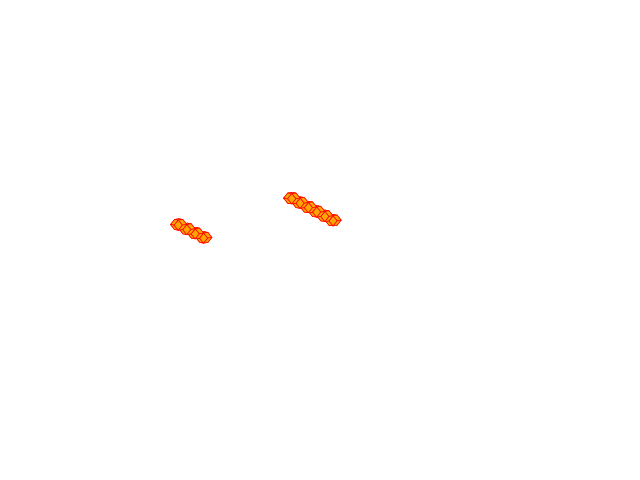

interactive(children=(FloatSlider(value=0.5, description='tilt', max=1.5, min=-0.5), FloatSlider(value=1.0, de…

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


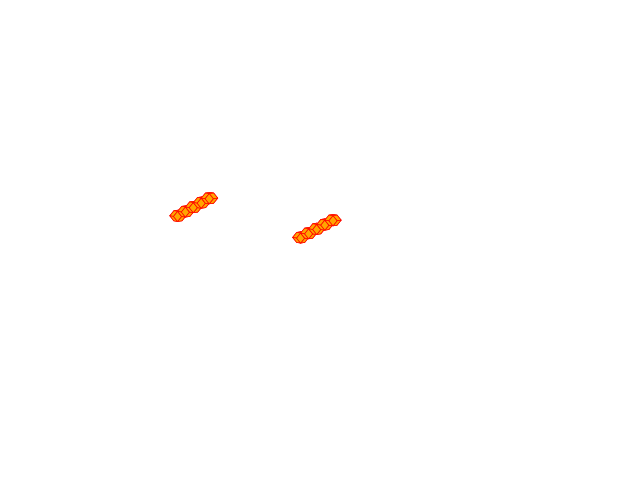

interactive(children=(FloatSlider(value=0.5, description='tilt', max=1.5, min=-0.5), FloatSlider(value=1.0, de…

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


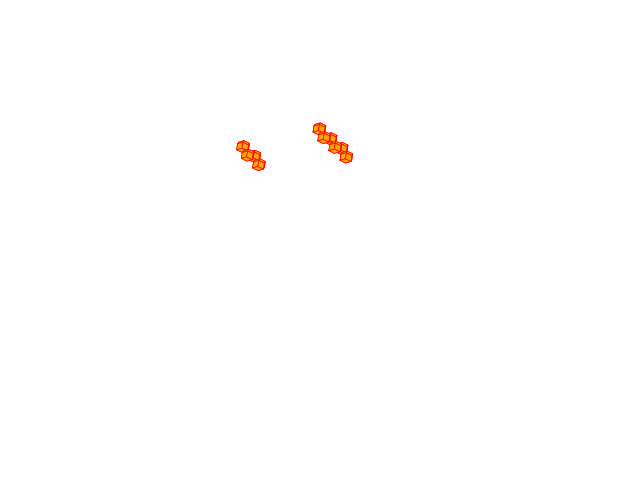

interactive(children=(FloatSlider(value=0.5, description='tilt', max=1.5, min=-0.5), FloatSlider(value=1.0, de…

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


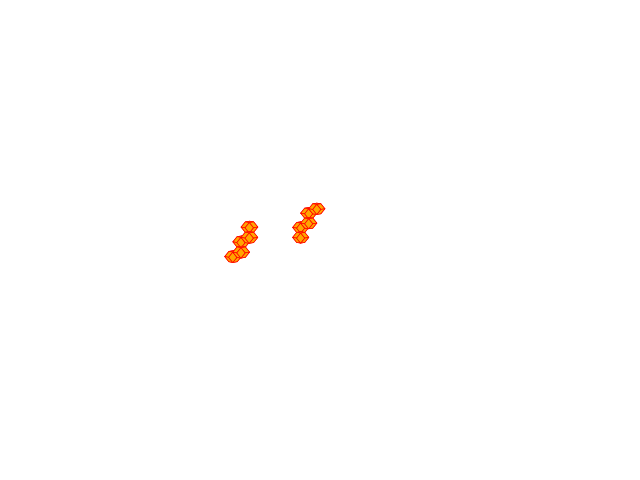

interactive(children=(FloatSlider(value=0.5, description='tilt', max=1.5, min=-0.5), FloatSlider(value=1.0, de…

In [345]:
grid = np.zeros((10,10,10))


for i in range(10):
    #grid[0,0,i] = 1
    grid[(8+i//2)%10,(8+i//2)%10,i] = 1
    #grid[0,i//2,i] = 1
    #grid[-i//2+9,-i//2+9,i] = 1

    
print("Percolation using non-periodic boundary?", check_percolation_3d_RDG4(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d_RDG4(grid, periodic=True))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
plot_3d_RDG4_grid(coordinates_list, alphas=alphas, scale=0.2)

grid = np.zeros((10,10,10))


for i in range(10):
    #grid[0,0,i] = 1
    grid[(2-(i+1)//2)%10,(2-(i+1)//2)%10,i] = 1
    #grid[0,i//2,i] = 1
    #grid[-i//2+,-i//2+9,i] = 1
    
print("Percolation using non-periodic boundary?", check_percolation_3d_RDG4(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d_RDG4(grid, periodic=True))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
plot_3d_RDG4_grid(coordinates_list, alphas=alphas, scale=0.2)

grid = np.zeros((10,10,10))


for i in range(10):
    #grid[0,0,i] = 1
    grid[8,(8+i//2)%10,i] = 1
    #grid[0,i//2,i] = 1
    #grid[-i//2+,-i//2+9,i] = 1
    
print("Percolation using non-periodic boundary?", check_percolation_3d_RDG4(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d_RDG4(grid, periodic=True))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
plot_3d_RDG4_grid(coordinates_list, alphas=alphas, scale=0.2)

grid = np.zeros((10,10,10))


for i in range(10):
    #grid[0,0,i] = 1
    grid[2,(2-(i+1)//2)%10,i] = 1
    #grid[0,i//2,i] = 1
    #grid[-i//2+,-i//2+9,i] = 1
    
print("Percolation using non-periodic boundary?", check_percolation_3d_RDG4(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d_RDG4(grid, periodic=True))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
plot_3d_RDG4_grid(coordinates_list, alphas=alphas, scale=0.2)

In [171]:
grid = create_3d_grid(20, 0.2)
print(check_percolation_3d_RDG4(grid))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
#plot_3d_RDG_grid(coordinates_list, alphas=alphas, scale=0.1)

True


In [36]:
N_vals = [5, 10, 20]
p_vals_count = 100
iter_per_param = 50
periodic = True

data_3d_RDG4_coarse = simulate_3d_RDG4(N_vals, p_vals_count, iter_per_param, periodic=periodic)

3it [00:16,  5.34s/it]


In [29]:
plt.ioff()

<IPython.core.display.Javascript object>


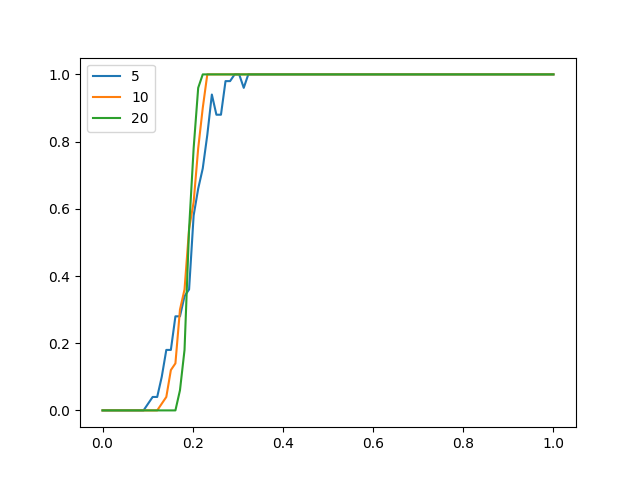

[0.20202020202020204, 0.19191919191919193, 0.19191919191919193]

In [37]:
plot_results_3d(data_3d_RDG4_coarse)

In [38]:
N_vals = [5, 10, 20]
p_vals_count = 100
iter_per_param = 50
periodic = True
p_range=(0.15, 0.23)

data_3d_RDG4_fine = simulate_3d_RDG4(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)

3it [00:19,  6.66s/it]


<IPython.core.display.Javascript object>


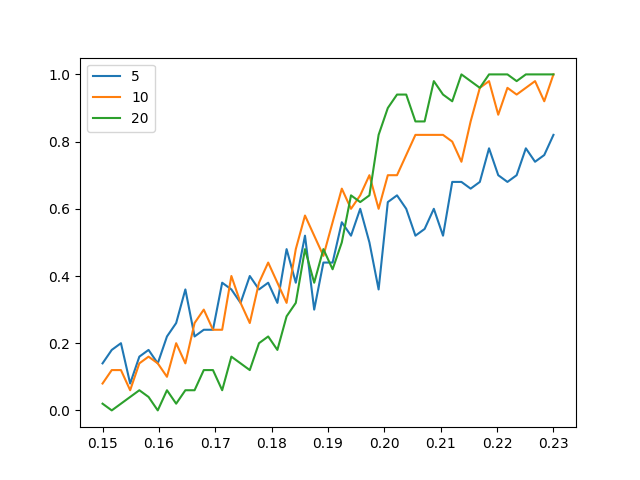

[0.18591836734693878, 0.18591836734693878, 0.19244897959183674]

In [39]:
plot_results_3d(data_3d_RDG4_fine, p_range=p_range)

In [61]:
# Gather data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
periodic = True
#p_range=(0.15, 0.23)
p_range=(0, 1)
files_RDG4 = []

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG4_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_RDG4.append(file)

while True:
    
    data_RDG4 = simulate_3d_RDG4(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
    
    for i, N in enumerate(N_vals):
        files_RDG4[i].write(f"{list(data_RDG4[i])}#")
    

4it [00:59, 14.81s/it]
4it [00:59, 14.86s/it]
4it [00:59, 14.80s/it]
4it [00:59, 14.89s/it]
4it [00:58, 14.72s/it]
1it [00:02,  2.25s/it]


KeyboardInterrupt: 

In [62]:
for file in files_RDG4:
    file.close()

11150
(0.6790134529147982, 0.19686868686868686)


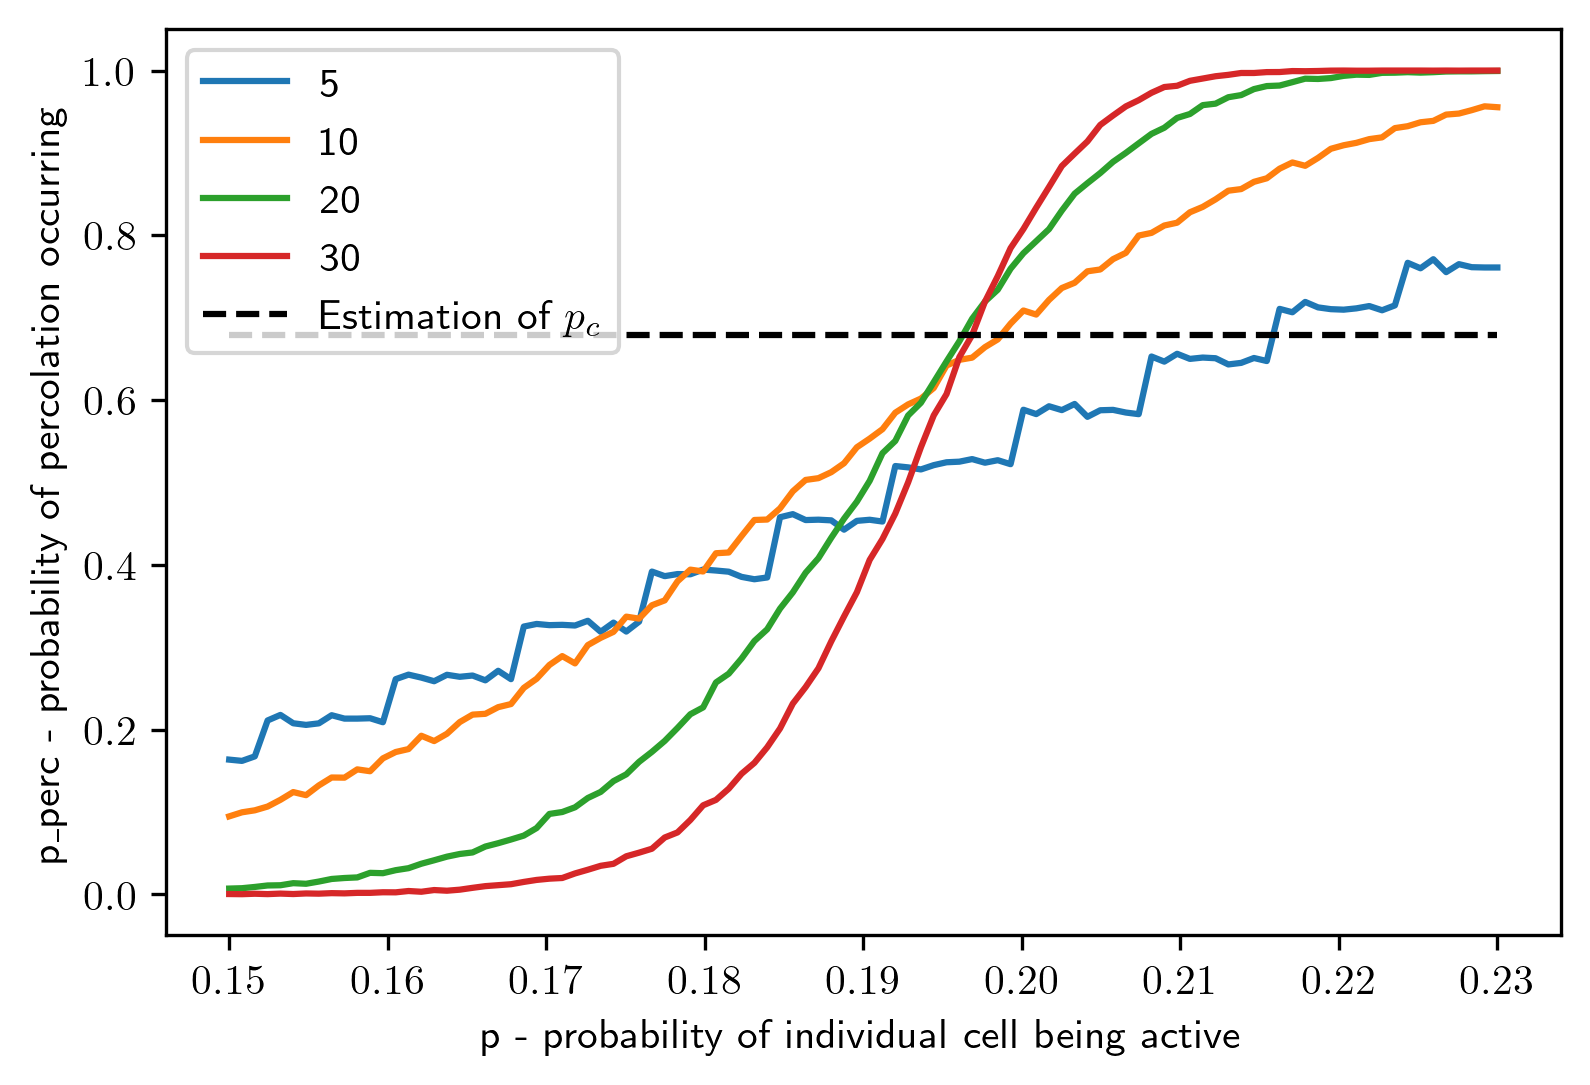

In [97]:
# Plot from data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
periodic = True
p_range=(0.15, 0.23)
#p_range=(0, 1)
data_square = []

all_N_total_arrs = []
for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG4_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)

all_N_total_arrs = np.array(all_N_total_arrs)
print(np.sum(all_N_total_arrs[3][0]))

plt.rcParams['text.usetex'] = True
plt.figure(dpi=300)
#plt.hlines(0.6180339887, p_range[0], p_range[1], color='black', label=r"$p^*=\varphi-1$")
res = plot_results_3d(all_N_total_arrs, p_range=p_range, include_halfmark=False, show_plot=False)
print(res)
plt.hlines(res[0], p_range[0], p_range[1], color='black', linestyle='dashed', label=r"Estimation of $p_c$")
plt.legend()
plt.savefig('RDG4_plot(0.38, 0.6).png')
plt.rcParams['text.usetex'] = False

# 3D Rhombic dodecahedra case (RDG-6)

In [16]:
# Load lightning visualization capabilities
#%matplotlib notebook
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import copy
from ipywidgets import *

# Calculate cartesian vertex positions

vertices = np.array([
    [ 1,  1,  1], # 0
    [ 1,  1, -1], # 1
    [ 1, -1,  1], # 2
    [ 1, -1, -1], # 3
    [-1,  1,  1], # 4
    [-1,  1, -1], # 5
    [-1, -1,  1], # 6
    [-1, -1, -1], # 7
    [ 0,  0,  2], # 8
    [ 0,  0, -2], # 9
    [ 0,  2,  0], # 10
    [ 0, -2,  0], # 11
    [ 2,  0,  0], # 12
    [-2,  0,  0]  # 13
])

# Normalize vertex coordinates
vertices = vertices / np.sqrt(2)

# Rotate the vertices 1/sqrt(3) radians along the axis (1,1,0) to make obtuse vertex be straight upwards
axis = [1/np.sqrt(2),1/np.sqrt(2),0]
angle = np.arccos(1/np.sqrt(3))

# Decompose axis vector
x, y, z = axis

# Calculate the components of the rotation matrix
cos_theta = np.cos(angle)
sin_theta = np.sin(angle)
one_minus_cos = 1 - cos_theta

# Rodrigues' rotation matrix
# https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula
rotation_matrix = np.array([
    [cos_theta + x**2 * one_minus_cos,       x*y*one_minus_cos - z*sin_theta,  x*z*one_minus_cos + y*sin_theta],
    [y*x*one_minus_cos + z*sin_theta,        cos_theta + y**2 * one_minus_cos, y*z*one_minus_cos - x*sin_theta],
    [z*x*one_minus_cos - y*sin_theta,        z*y*one_minus_cos + x*sin_theta,  cos_theta + z**2 * one_minus_cos]
])

# Rotate each point by the rotation matrix
rotated_vertices = np.dot(vertices, rotation_matrix.T)

# Rotate the vertices 45 degrees along the z-axis to make obtuse vertex be upwards
axis = [0,0,1]
angle = np.arccos(1/np.sqrt(2))

# Decompose axis vector
x, y, z = axis

# Calculate the components of the rotation matrix
cos_theta = np.cos(angle)
sin_theta = np.sin(angle)
one_minus_cos = 1 - cos_theta

# Rodrigues' rotation matrix
# https://en.wikipedia.org/wiki/Rodrigues%27_rotation_formula
rotation_matrix = np.array([
    [cos_theta + x**2 * one_minus_cos,       x*y*one_minus_cos - z*sin_theta,  x*z*one_minus_cos + y*sin_theta],
    [y*x*one_minus_cos + z*sin_theta,        cos_theta + y**2 * one_minus_cos, y*z*one_minus_cos - x*sin_theta],
    [z*x*one_minus_cos - y*sin_theta,        z*y*one_minus_cos + x*sin_theta,  cos_theta + z**2 * one_minus_cos]
])

# Rotate each point by the rotation matrix
rotated_vertices = np.dot(rotated_vertices, rotation_matrix.T)
    
rhombic_dodecahedron_vertices = rotated_vertices


# Which 4-tuples of vertex indices should connect to make a face
rhombic_dodecahedron_faces = [
        [0, 8, 2, 12], [6, 8, 4, 13], [0, 8, 4, 10], [2, 8, 6, 11], # top 4
        [0, 10, 1, 12], [2, 12, 3, 11], [6, 11, 7, 13], [4, 13, 5, 10], # middle 4
        [1, 9, 3, 12], [7, 9, 5, 13], [1, 9, 5, 10], [3, 9, 7, 11] # bottom 4
    ]


def plot_rhombic_dodecahedron(ax, pos=(0,0,0), color='cyan', alpha=0.3, scale=1, line_thickness = 1, no_grid=False):
    vertices = rhombic_dodecahedron_vertices
    faces = rhombic_dodecahedron_faces

    pos = np.array(pos, dtype=float)

    cartes_pos = copy.deepcopy(pos)
    
    cartes_pos[0] += pos[2]*np.cos(np.pi/3)/np.sqrt(2) # - 1*pos[2]//2
    cartes_pos[1] += pos[2]*np.sin(np.pi/3)/np.sqrt(2) # + 1*(pos[2]//2)

    #if pos[2] % 2 == 1:
    #cartes_pos[0] += pos[1]
        #color = 'orange'

    poly3d = [[(np.array(vertices[vertice])+np.array(cartes_pos)*np.sqrt(2))*scale for vertice in face] for face in faces]
    ax.add_collection3d(Poly3DCollection(poly3d, facecolors=color, linewidths=0.5*line_thickness, edgecolors='black', alpha=alpha))

    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_zlim([-4, 4])
    
    # Hide grid lines
    if no_grid:
        ax.grid(False)

        # Hide axes ticks
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        plt.axis('off')

        plt.grid(b=None)
    else:
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

    

def plot_3d_RDG6_grid(pos_list, colors=[], alphas=[], scale=1, line_thickness=1, twirl=False, no_grid=False):
    
    if len(colors) != len(pos_list):
        colors = ['orange'] * len(pos_list)
    if len(alphas) != len(pos_list):
        alphas = [0.1] * len(pos_list)
    
    x = np.linspace(0, 2 * np.pi)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')

    for i, pos in enumerate(pos_list):
        plot_rhombic_dodecahedron(ax, gridpos_to_plot_pos(pos), colors[i], alpha=alphas[i], scale=scale, line_thickness=line_thickness, no_grid = no_grid)

    plt.axis('off')

    def update(tilt = 0.2, jaw=1.0):
        ax.view_init(elev=tilt*90, azim=jaw*90)
        fig.canvas.draw_idle()

    interact(update);

def gridpos_to_plot_pos(pos):
    # Old version
    return (pos[0]*np.sqrt(3)/np.sqrt(2), pos[1]*np.sqrt(2) - pos[0]/np.sqrt(2), pos[2]*2/np.sqrt(3))
    
    # new version
    x, y, z = pos
    y += x // 2
    y -= ((z+1) // 3)
    x -= ((z+2) // 3)
    y -= ((z+2) // 3)
    return (x*np.sqrt(3)/np.sqrt(2), y*np.sqrt(2) - x/np.sqrt(2), z*2/np.sqrt(3))
    
    

In [25]:
import random as rnd
import heapq
# Check for percolation
def check_percolation_3d_RDG6(grid, periodic = False):
    # Label connected components of 1s
    
    heap = []
    visited = set()
    
    for i in range(grid.shape[0]):
        for j in range(grid.shape[0]):
            if grid[i, j, 0] == 1:
                heapq.heappush(heap, (0, i, j, 0))  # (priority, x, y, z)
            

    
    while heap:
        
        priority, val_x, val_y, val_z = heapq.heappop(heap)
        
        val = (val_x, val_y, val_z)
        
        visited.add(val)

        neighbors = [(1, 0, 0), 
                     (0, 1, 0), 
                     (-1, 0, 0), 
                     (0,-1, 0), 
                     (0, 0, 1), 
                     (0, 0, -1),  
                    (0, -1, 1), 
                    (0, -1, -1), 
                    (-1, -1, 1), 
                    (-1, -1, -1),
                    (-1, 0, -1),
                    (-1, 0, 1)]


        for dx, dy, dz in neighbors:
            
            if periodic:
                new_x = (val[0]+dx)%grid.shape[0]
                new_y = (val[1]+dy)%grid.shape[0]
                new_z = val[2]+dz
            else:
                new_x = val[0]+dx
                new_y = val[1]+dy
                new_z = val[2]+dz
                
            
            if new_x < grid.shape[0] and \
               new_x >= 0 and \
               new_y < grid.shape[0] and \
               new_y >= 0 and \
               new_z < grid.shape[0] and \
               new_z >= 0:
                
                if grid[new_x, new_y, new_z] == 1:
                    if new_z == grid.shape[0]-1:
                        return True
                    if (-new_z, new_x, new_y, new_z) not in heap and (new_x, new_y, new_z) not in visited:
                        heapq.heappush(heap, (-new_z, new_x, new_y, new_z))  
                        
    
    return False


In [26]:
from tqdm import tqdm

def simulate_3d_RDG6(N_vals, p_vals_count, iter_per_param, p_range=(0,1), periodic=False):
    data = np.zeros((len(N_vals), p_vals_count, 2))

    for N_i, N in tqdm(enumerate(N_vals)):
        for p_i, p in enumerate(np.linspace(p_range[0], p_range[1], p_vals_count)):
            for _ in range(iter_per_param):
                # Create grid
                grid = create_3d_grid(N, p)

                # Test for percolation
                perc_true = int(check_percolation_3d_RDG6(grid, periodic=periodic))
                
                # Count
                data[N_i, p_i, perc_true] += 1
    return data

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


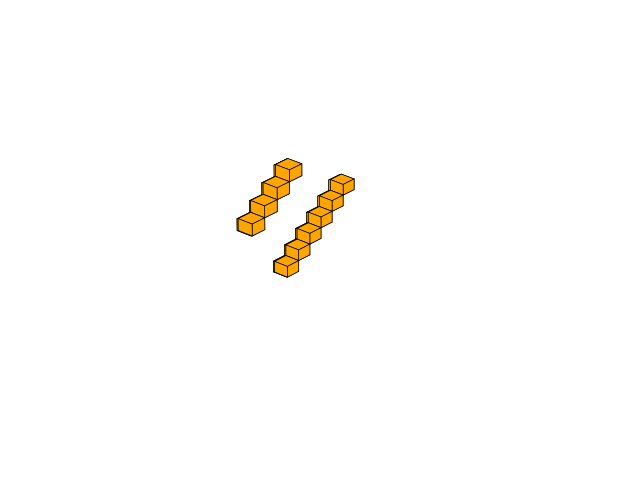

interactive(children=(FloatSlider(value=0.2, description='tilt', max=0.6000000000000001, min=-0.2), FloatSlide…

Percolation using non-periodic boundary? False
Percolation using periodic boundary? True


<IPython.core.display.Javascript object>


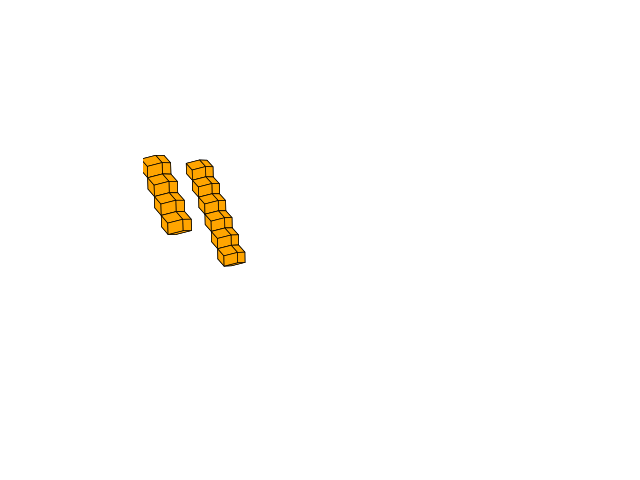

interactive(children=(FloatSlider(value=0.2, description='tilt', max=0.6000000000000001, min=-0.2), FloatSlide…

In [381]:
grid = np.zeros((10,10,10))

for i in range(10):
    grid[(5-i)%10,(5-i)%10,i] = 1


print("Percolation using non-periodic boundary?", check_percolation_3d_RDG6(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d_RDG6(grid, periodic=True))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
plot_3d_RDG6_grid(coordinates_list, alphas=alphas, scale=0.4)


grid = np.zeros((10,10,10))

for i in range(10):
    grid[5,(5-i)%10,i] = 1


print("Percolation using non-periodic boundary?", check_percolation_3d_RDG6(grid, periodic=False))
print("Percolation using periodic boundary?", check_percolation_3d_RDG6(grid, periodic=True))

coordinates = np.argwhere(grid == 1)

# Convert to a list of tuples
coordinates_list = [tuple(coord) for coord in coordinates]
alphas = np.ones(len(coordinates_list))
plot_3d_RDG6_grid(coordinates_list, alphas=alphas, scale=0.4)


In [25]:
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
periodic = True
p_range = (0, 1)

data_3d_RDG6_coarse = simulate_3d_RDG6(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)

4it [00:55, 13.77s/it]


<IPython.core.display.Javascript object>


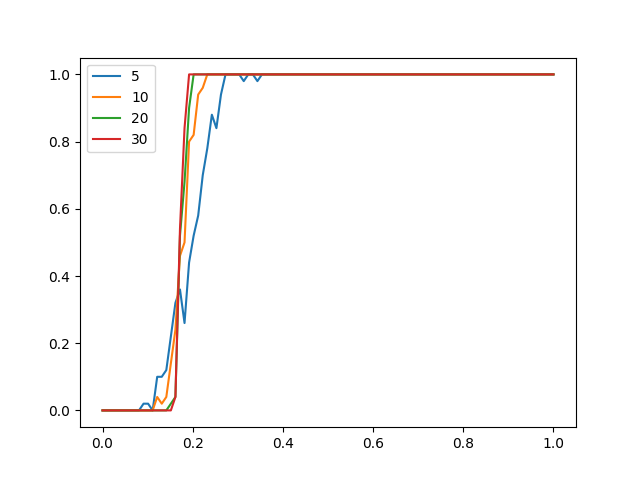

[0.20202020202020204,
 0.18181818181818182,
 0.17171717171717174,
 0.17171717171717174]

In [30]:
plot_results_3d(data_3d_RDG6_coarse, p_range=p_range)

In [33]:
N_vals = [5, 10, 20, 30]
p_vals_count = 50
iter_per_param = 50
periodic=True
p_range=(0.13, 0.21)

data_3d_RDG6_fine = simulate_3d_RDG6(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)

4it [01:14, 18.50s/it]


<IPython.core.display.Javascript object>


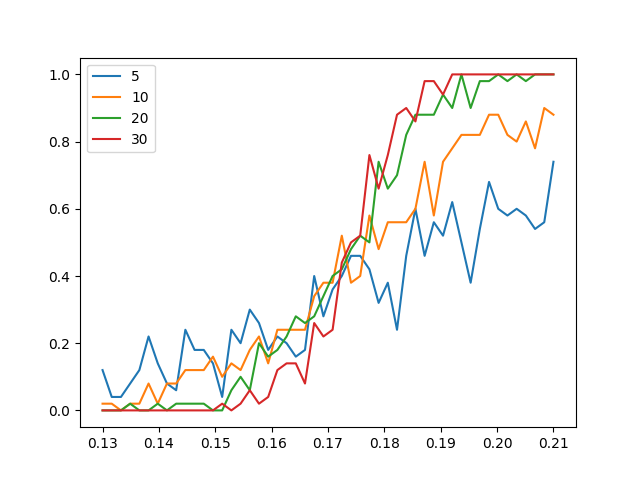

[0.18551020408163266,
 0.17244897959183675,
 0.1757142857142857,
 0.17408163265306123]

In [34]:
plot_results_3d(data_3d_RDG6_fine, p_range=p_range)

In [93]:
# Gather data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
p_range=(0.14, 0.21)
#p_range=(0, 1)
periodic=True
files_RDG6 = []

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG6_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_RDG6.append(file)

while True:
    
    data_RDG6 = simulate_3d_RDG6(N_vals, p_vals_count, iter_per_param, p_range=p_range, periodic=periodic)
    
    for i, N in enumerate(N_vals):
        files_RDG6[i].write(f"{list(data_RDG6[i])}#")
    

4it [01:03, 15.95s/it]
4it [01:04, 16.05s/it]
4it [01:04, 16.00s/it]
4it [01:04, 16.18s/it]
4it [01:03, 15.84s/it]
4it [01:03, 15.90s/it]
4it [01:03, 15.87s/it]
4it [01:03, 16.00s/it]
4it [01:02, 15.75s/it]
4it [01:04, 16.03s/it]
4it [01:03, 15.93s/it]
4it [01:04, 16.03s/it]
4it [01:03, 15.84s/it]
4it [01:03, 15.77s/it]
4it [01:03, 15.83s/it]
4it [01:03, 15.92s/it]
4it [01:04, 16.16s/it]
4it [01:03, 15.90s/it]
4it [01:03, 15.99s/it]
4it [01:04, 16.04s/it]
4it [01:04, 16.07s/it]
4it [01:05, 16.27s/it]
4it [01:03, 15.92s/it]
4it [01:05, 16.34s/it]
4it [01:05, 16.44s/it]
4it [01:05, 16.35s/it]
4it [01:04, 16.04s/it]
4it [01:10, 17.51s/it]
4it [01:08, 17.13s/it]
4it [01:07, 16.84s/it]
4it [01:03, 15.98s/it]
4it [01:07, 16.79s/it]
4it [01:05, 16.44s/it]
4it [01:08, 17.22s/it]
4it [01:06, 16.64s/it]
4it [01:04, 16.14s/it]
4it [01:03, 15.92s/it]
4it [01:03, 15.84s/it]
4it [01:04, 16.01s/it]
4it [01:05, 16.38s/it]
4it [01:05, 16.49s/it]
4it [01:04, 16.15s/it]
4it [01:03, 15.94s/it]
4it [01:03,

KeyboardInterrupt: 

In [94]:
for file in files_RDG6:
    file.close()

1000
(0.378, 0.17171717171717174)


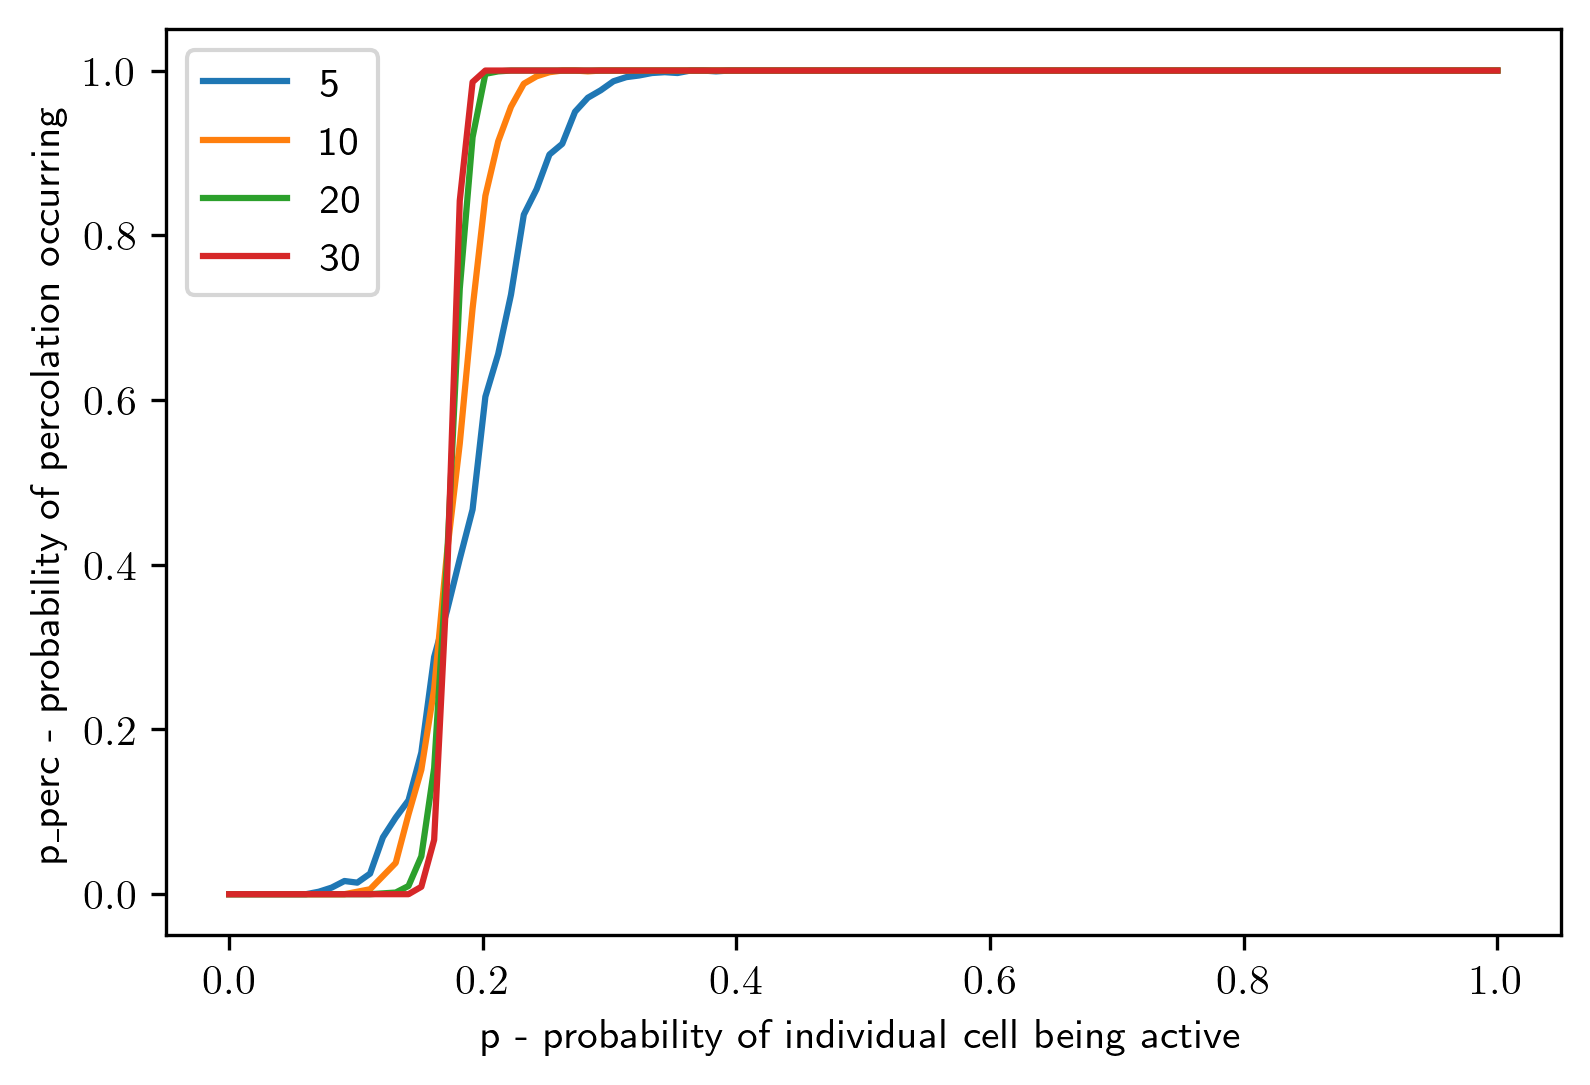

In [103]:
# Plot from data
N_vals = [5, 10, 20, 30]
p_vals_count = 100
p_range=(0.14, 0.21)
p_range=(0, 1)
periodic = True
data_RDG6 = []

all_N_total_arrs = []
for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG6_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)

all_N_total_arrs = np.array(all_N_total_arrs)
print(np.sum(all_N_total_arrs[0][0]))

plt.rcParams['text.usetex'] = True
plt.figure(dpi=300)
#plt.hlines(0.6180339887, p_range[0], p_range[1], color='black', label=r"$p^*=\varphi-1$")
res = plot_results_3d(all_N_total_arrs, p_range=p_range, include_halfmark=False, show_plot=False)
print(res)
#plt.hlines(res[0], p_range[0], p_range[1], color='black', linestyle='dashed', label=r"Estimation of $p_c$")
plt.legend()
#plt.savefig('RDG6_plot(0.13, 0.21).png')
plt.rcParams['text.usetex'] = False


# All data collection

In [18]:
# Set global parameters
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
periodic = True

# Open all the files

p_range_square = (0.45, 0.7)
files_square = []

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\square_{N}_{p_range_square}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_square.append(file)
    
files_hexagon = []
p_range_hex=(0.38, 0.6)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\hexagon_{N}_{p_range_hex}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_hexagon.append(file)
    
files_cube = []
p_range_cube=(0.2, 0.4)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\cube_{N}_{p_range_cube}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_cube.append(file)

files_RDG4 = []
p_range_RD4=(0.15, 0.23)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG4_{N}_{p_range_RD4}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_RDG4.append(file)
    
files_RDG6 = []
p_range_RD6=(0.14, 0.21)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG6_{N}_{p_range}_{p_range_RD6}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'a')
    files_RDG6.append(file)

    
    


count = 0
while True:
    # Square
    # Gather data
    for _ in range(5):

        data_square = simulate_2d(N_vals, p_vals_count, iter_per_param, p_range=p_range_square, periodic=periodic)

        for i, N in enumerate(N_vals):
            files_square[i].write(f"{list(data_square[i])}#")
    print('s', end='')


    # Hexagon
    # Gather data
    for _ in range(5):

        data_hexagon = simulate_2d_hex(N_vals, p_vals_count, iter_per_param, p_range=p_range_hex, periodic=periodic)

        for i, N in enumerate(N_vals):
            files_hexagon[i].write(f"{list(data_hexagon[i])}#")
    print('h', end='')
            

    # Cube
    # Gather data
    for _ in range(5):
        data_cube = simulate_3d(N_vals, p_vals_count, iter_per_param, p_range=p_range_cube, periodic=periodic)

        for i, N in enumerate(N_vals):
            files_cube[i].write(f"{list(data_cube[i])}#")
    print('c', end='')


    #RDG-4
    # Gather data
    for _ in range(5):

        data_RDG4 = simulate_3d_RDG4(N_vals, p_vals_count, iter_per_param, p_range=p_range_RD4, periodic=periodic)

        for i, N in enumerate(N_vals):
            files_RDG4[i].write(f"{list(data_RDG4[i])}#")
    print('4', end='')

    #RDG-6

    # Gather data
    for _ in range(5):

        data_RDG6 = simulate_3d_RDG6(N_vals, p_vals_count, iter_per_param, p_range=p_range_RD6, periodic=periodic)

        for i, N in enumerate(N_vals):
            files_RDG6[i].write(f"{list(data_RDG6[i])}#")
    print('6', end='')
    
    count += 5
    print(f'   total count for each grid: {count}')
    


0it [00:00, ?it/s]2it [00:04,  2.00s/it]


KeyboardInterrupt: 

In [19]:
for file in files_square:
    file.close()
for file in files_hexagon:
    file.close()
for file in files_cube:
    file.close()
for file in files_RDG4:
    file.close()
for file in files_RDG6:
    file.close()

5700 Datapoints for N=5, square
5700 Datapoints for N=10, square
5700 Datapoints for N=20, square
5700 Datapoints for N=30, square
N=5 => p_c = 44.444
N=10 => p_c = 48.485
N=20 => p_c = 51.515
N=30 => p_c = 52.525



6200 Datapoints for N=5, hexagon
6200 Datapoints for N=10, hexagon
6200 Datapoints for N=20, hexagon
6200 Datapoints for N=30, hexagon


<IPython.core.display.Javascript object>


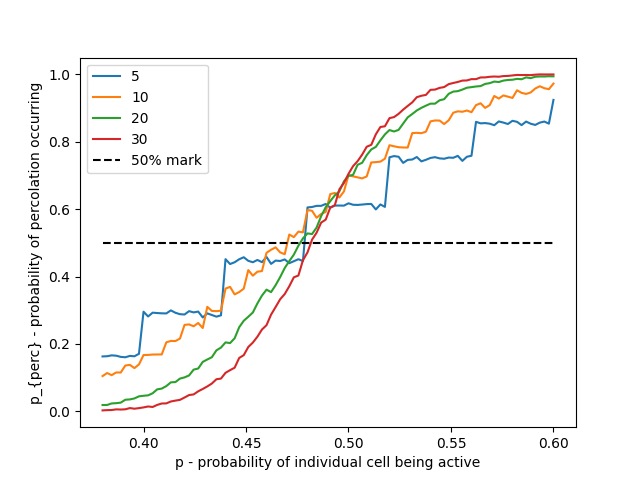

N=5 => p_c = 45.455
N=10 => p_c = 41.414
N=20 => p_c = 44.444
N=30 => p_c = 46.465



5800 Datapoints for N=5, cube
5800 Datapoints for N=10, cube
5800 Datapoints for N=20, cube
5800 Datapoints for N=30, cube


<IPython.core.display.Javascript object>


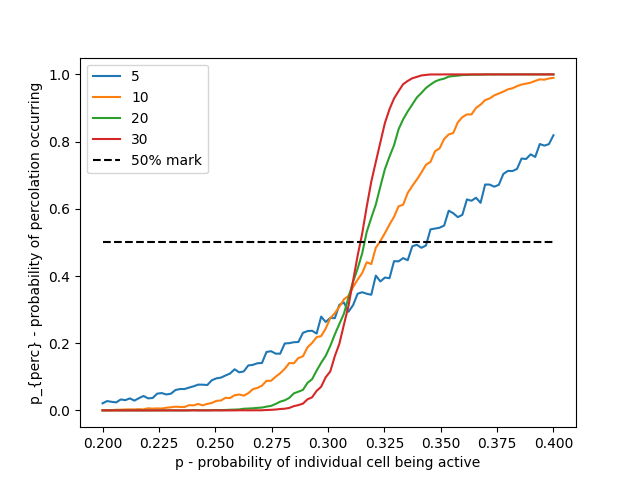

N=5 => p_c = 34.545
N=10 => p_c = 32.323
N=20 => p_c = 31.717
N=30 => p_c = 31.515



11150 Datapoints for N=5, RDG4
11150 Datapoints for N=10, RDG4
11150 Datapoints for N=20, RDG4
11150 Datapoints for N=30, RDG4


<IPython.core.display.Javascript object>


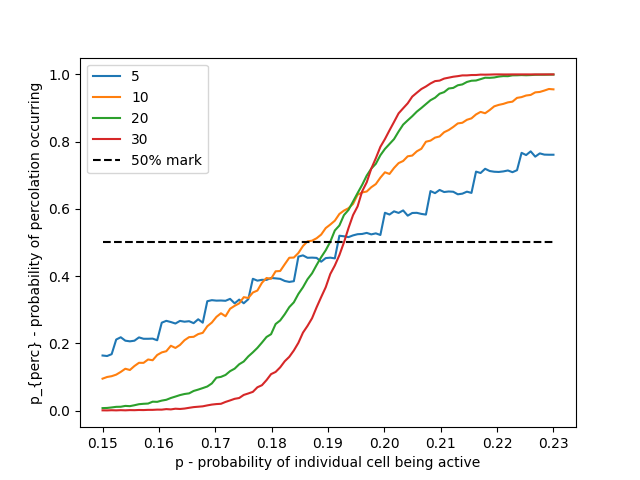

N=5 => p_c = 19.202
N=10 => p_c = 18.636
N=20 => p_c = 19.04
N=30 => p_c = 19.283



9450 Datapoints for N=5, RDG6
9450 Datapoints for N=10, RDG6
9450 Datapoints for N=20, RDG6
9450 Datapoints for N=30, RDG6


<IPython.core.display.Javascript object>


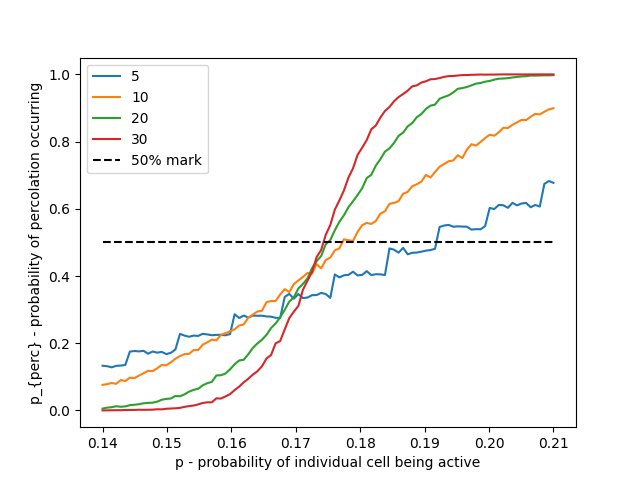

N=5 => p_c = 19.232
N=10 => p_c = 17.747
N=20 => p_c = 17.535
N=30 => p_c = 17.465


In [30]:
# Plot all outputs

# Set global parameters
N_vals = [5, 10, 20, 30]
p_vals_count = 100
iter_per_param = 50
periodic = True

# Open all the files

all_N_total_arrs = []
p_range_square = (0.45, 0.7)
#p_range_square = (0, 1)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\square_{N}_{p_range_square}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, square")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_2d(all_N_total_arrs, p_range=p_range_square)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")
    
print('\n\n')

all_N_total_arrs = []
p_range_hex=(0.38, 0.6)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\hexagon_{N}_{p_range_hex}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, hexagon")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_2d(all_N_total_arrs, p_range=p_range_hex)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")
    
print('\n\n')

all_N_total_arrs = []
p_range_cube=(0.2, 0.4)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\cube_{N}_{p_range_cube}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, cube")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_3d(all_N_total_arrs, p_range=p_range_cube)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")

print('\n\n')

all_N_total_arrs = []
p_range_RD4=(0.15, 0.23)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG4_{N}_{p_range_RD4}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, RDG4")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_3d(all_N_total_arrs, p_range=p_range_RD4)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")

print('\n\n')

all_N_total_arrs = []
p_range_RD6=(0.14, 0.21)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG6_{N}_{p_range_RD6}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, RDG6")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_3d(all_N_total_arrs, p_range=p_range_RD6)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")

3800 Datapoints for N=30, square
N=30 => p_c = 58.586



2050 Datapoints for N=30, hexagon
N=30 => p_c = 48.485



2050 Datapoints for N=30, cube
N=30 => p_c = 32.323



750 Datapoints for N=30, RDG4
N=30 => p_c = 20.202



1000 Datapoints for N=30, RDG6
N=30 => p_c = 18.182


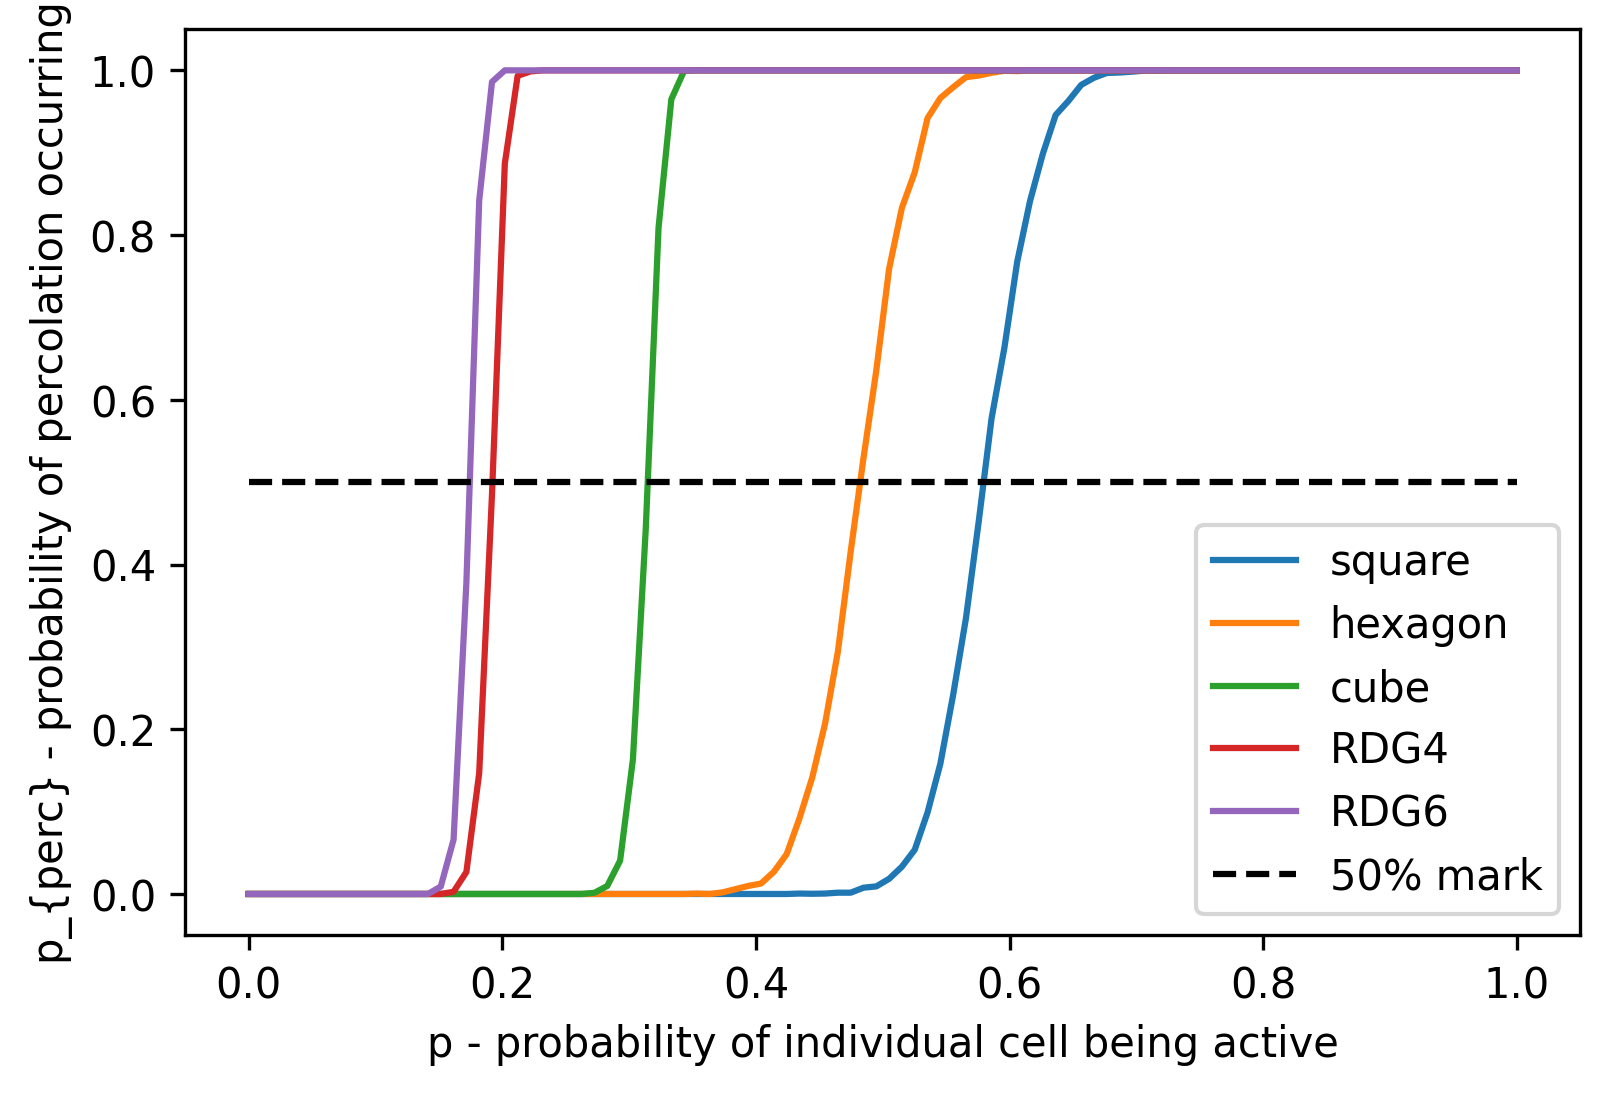

In [27]:
# Plot all outputs
plt.figure(dpi=300)

# Set global parameters
N_vals = [30]
p_vals_count = 100
periodic = True

# Open all the files

all_N_total_arrs = []
p_range = (0, 1)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\square_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, square")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_2d(all_N_total_arrs, p_range=p_range, show_plot=False, custom_label='square', include_halfmark=False)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")
    
print('\n\n')

all_N_total_arrs = []
p_range_hex=(0.38, 0.6)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\hexagon_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, hexagon")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_2d(all_N_total_arrs, p_range=p_range, show_plot=False, custom_label='hexagon', include_halfmark=False)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")
    
print('\n\n')

all_N_total_arrs = []
p_range_cube=(0.2, 0.4)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\cube_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, cube")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_3d(all_N_total_arrs, p_range=p_range, show_plot=False, custom_label='cube', include_halfmark=False)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")

print('\n\n')

all_N_total_arrs = []
p_range_RD4=(0.15, 0.23)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG4_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, RDG4")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_3d(all_N_total_arrs, p_range=p_range, show_plot=False, custom_label='RDG4', include_halfmark=False)
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")

print('\n\n')

all_N_total_arrs = []
p_range_RD6=(0.14, 0.21)

for N in N_vals:
    file_name = f"C:\\Users\\gabri\\Desktop\\NS162 Final workbooks\\data\\RDG6_{N}_{p_range}_{p_vals_count}_{'periodic_' if periodic else ''}data.txt"
    file = open(file_name, 'r')
    data_str = file.read()
    data_str = data_str.replace('array', 'np.array')
    data_str = data_str.replace(')', ', dtype=np.int32)')
    data_str = data_str.split('#')[:-1]
    file.close()
    total_arr = np.array([np.array([0, 0]) for _ in range(p_vals_count)])
    for single_arr_str in data_str:
        single_arr = np.array(eval(single_arr_str)) # Dangerous!
        total_arr += single_arr
    all_N_total_arrs.append(total_arr)
    print(np.sum(total_arr[0]), f"Datapoints for N={N}, RDG6")

all_N_total_arrs = np.array(all_N_total_arrs)
results = plot_results_3d(all_N_total_arrs, p_range=p_range, show_plot=False, custom_label='RDG6')
for i, result in enumerate(results):
    print(f"N={N_vals[i]} => p_c = {round(100*result, 3)}")
    
    
plt.savefig('N=30.png')

Talking about phase transition stuff.
Connect to Ising model

Renormalization can be connected to #Coarsegraining. The probability of percolation is p^n where n is the number of layers and p is the probability of percolation between a given layer. Talk about this.

How does magnetization look like as a function of the deviation from the critical temperature:
<m>(T - T_c) \sim \Delta T^3 or something
In the other direction it could scale in a different way:
<m>(T_c - T) \sim \Delta T^2 or something
This scaling connects to universality class, fall into a certain type of scaling, connects to the general idea of #coarsegraining
    
Do a capstone level LO entry for statisticalsimulation
    
  